**Importing Libraries**

In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np

from datetime import date
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading the dataset**

In [4]:
features = pd.read_csv('/content/drive/MyDrive/Xccelerate/02 ML Project/Datasets/features.csv')
features.head()

Store        Date  Temperature  ...    CPI  Unemployment  IsHoliday
0      1  2010-02-05        42.31  ... 211.10          8.11      False
1      1  2010-02-12        38.51  ... 211.24          8.11       True
2      1  2010-02-19        39.93  ... 211.29          8.11      False
3      1  2010-02-26        46.63  ... 211.32          8.11      False
4      1  2010-03-05        46.50  ... 211.35          8.11      False

[5 rows x 12 columns]

In [5]:
stores = pd.read_csv('/content/drive/MyDrive/Xccelerate/02 ML Project/Datasets/stores.csv')
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [6]:
train = pd.read_csv('/content/drive/MyDrive/Xccelerate/02 ML Project/Datasets/train.csv')
train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [7]:
# Combine 3 dataset into 1 for train data
data = train.merge(features, on=['Store', 'Date','IsHoliday'], how='inner').merge(stores, on=['Store'], how='inner')
# Add new column "Total_MarkDown"
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
# Transform Date format and add new columns "Week", "Month", "Quarter", "Year"
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Quarter'] = data['Date'].dt.quarter
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


Store  Dept       Date  Weekly_Sales  ...  Year  Quarter  Month  Week
0           1     1 2010-02-05      24924.50  ...  2010        1      2     5
1           1     2 2010-02-05      50605.27  ...  2010        1      2     5
2           1     3 2010-02-05      13740.12  ...  2010        1      2     5
3           1     4 2010-02-05      39954.04  ...  2010        1      2     5
4           1     5 2010-02-05      32229.38  ...  2010        1      2     5
...       ...   ...        ...           ...  ...   ...      ...    ...   ...
421565     45    93 2012-10-26       2487.80  ...  2012        4     10    43
421566     45    94 2012-10-26       5203.31  ...  2012        4     10    43
421567     45    95 2012-10-26      56017.47  ...  2012        4     10    43
421568     45    97 2012-10-26       6817.48  ...  2012        4     10    43
421569     45    98 2012-10-26       1076.80  ...  2012        4     10    43

[421570 rows x 21 columns]

In [8]:
data.describe()

Store      Dept  Weekly_Sales  ...   Quarter     Month      Week
count 421570.00 421570.00     421570.00  ... 421570.00 421570.00 421570.00
mean      22.20     44.26      15981.26  ...      2.48      6.45     25.83
std       12.79     30.49      22711.18  ...      1.07      3.24     14.15
min        1.00      1.00      -4988.94  ...      1.00      1.00      1.00
25%       11.00     18.00       2079.65  ...      2.00      4.00     14.00
50%       22.00     37.00       7612.03  ...      2.00      6.00     26.00
75%       33.00     74.00      20205.85  ...      3.00      9.00     38.00
max       45.00     99.00     693099.36  ...      4.00     12.00     52.00

[8 rows x 18 columns]

In [9]:
#Check missing data
round(data.isnull().sum()/len(data)*100,2)

Store             0.00
Dept              0.00
Date              0.00
Weekly_Sales      0.00
IsHoliday         0.00
Temperature       0.00
Fuel_Price        0.00
MarkDown1        64.26
MarkDown2        73.61
MarkDown3        67.48
MarkDown4        67.98
MarkDown5        64.08
CPI               0.00
Unemployment      0.00
Type              0.00
Size              0.00
Total_MarkDown   76.98
Year              0.00
Quarter           0.00
Month             0.00
Week              0.00
dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

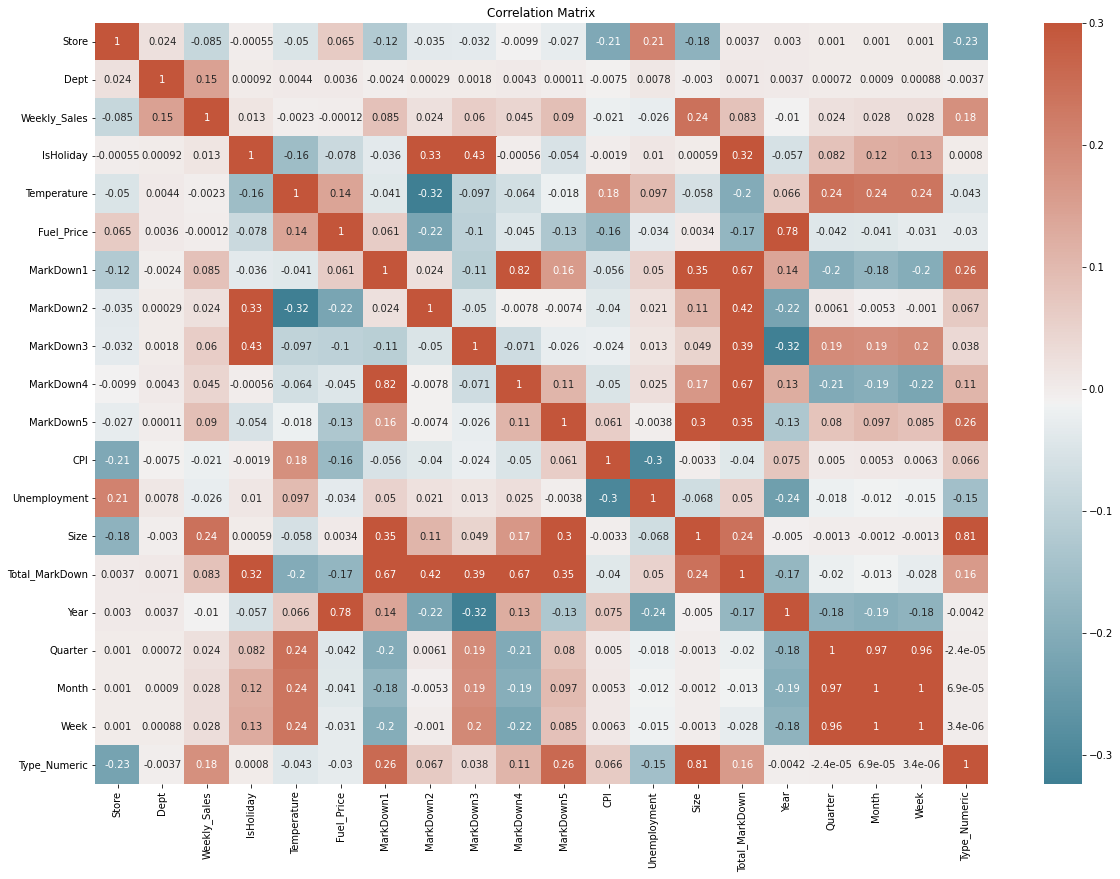

In [10]:
# To see which to keep which to remove
storetype_values = {'A':3, 'B':2, 'C':1}
data['Type_Numeric'] = data.Type.map(storetype_values)

plt.figure(figsize=(20,14))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap, vmax=.3, annot=True)
plt.title("Correlation Matrix")

### Data Exploratory

Total Company Overview

In [ ]:
ttl_weekly_sales = data.groupby(['Date','Year','Quarter','Month','Week','IsHoliday','Total_MarkDown'])['Weekly_Sales'].sum().reset_index()
ttl_weekly_sales

Date  Year  Quarter  ...  IsHoliday  Total_MarkDown  Weekly_Sales
0    2011-11-11  2011        4  ...      False         6773.00     311906.70
1    2011-11-11  2011        4  ...      False         7893.52     556015.59
2    2011-11-11  2011        4  ...      False         8733.51     594574.12
3    2011-11-11  2011        4  ...      False        12570.12     407764.25
4    2011-11-11  2011        4  ...      False        13488.71     513181.31
...         ...   ...      ...  ...        ...             ...           ...
1390 2012-10-26  2012        4  ...      False        13477.58    2031650.55
1391 2012-10-26  2012        4  ...      False        15909.11    1307182.29
1392 2012-10-26  2012        4  ...      False        17898.76    1340232.55
1393 2012-10-26  2012        4  ...      False        17985.13    2035189.66
1394 2012-10-26  2012        4  ...      False        21126.20     974697.60

[1395 rows x 8 columns]

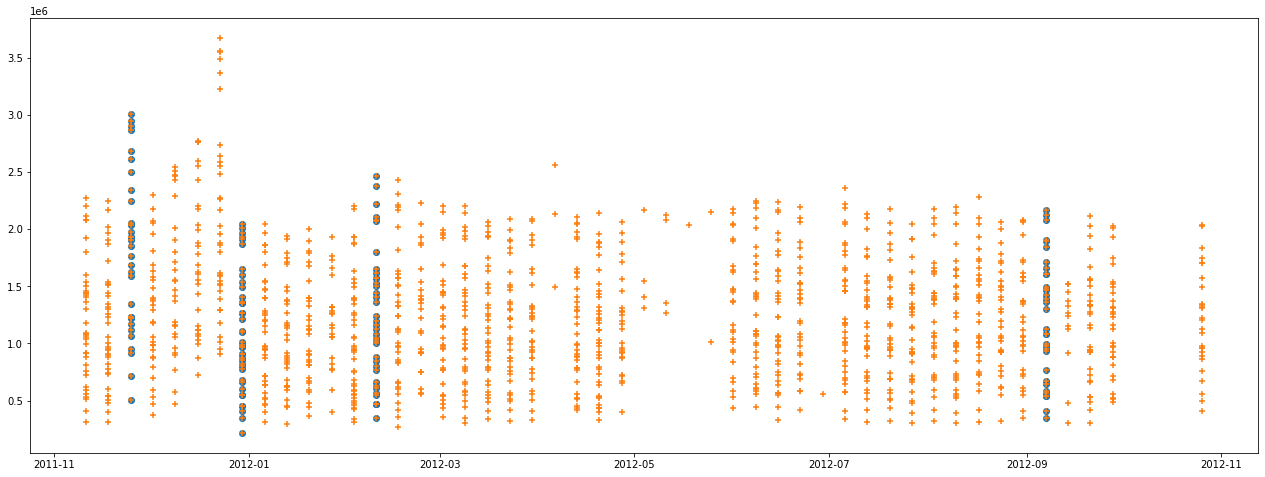

In [ ]:
# Relationship of holiday and markdown --> Not identical (need keep both of them)
plt.figure(figsize=(22,8))
plt.scatter(ttl_weekly_sales[(ttl_weekly_sales.IsHoliday == True)]['Date'].tolist(),ttl_weekly_sales[(ttl_weekly_sales.IsHoliday == True)]['Weekly_Sales'].tolist(),marker='o')
plt.scatter(ttl_weekly_sales[(ttl_weekly_sales.Total_MarkDown.notnull())]['Date'].tolist(),ttl_weekly_sales[(ttl_weekly_sales.Total_MarkDown.notnull())]['Weekly_Sales'].tolist(),marker='+')

In [18]:
# Walmart Weekly Sales
weekly_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
weekly_sales.describe()

Weekly_Sales
count        143.00
mean    47113419.49
std      5444206.20
min     39599852.99
25%     44880587.54
50%     46243899.58
75%     47792024.64
max     80931415.60

In [ ]:
# Walmart Monthly Sales
monthly_sales = data.groupby(['Month','Year'])['Weekly_Sales'].sum().reset_index()
monthly_sales['Weekly_Sales'].describe().to_frame()

Weekly_Sales
count         33.00
mean   204158151.12
std     30473304.89
min    163703966.83
25%    184361680.42
50%    189773385.19
75%    226526510.97
max    288760532.72

In [ ]:
# Walmart Quarter Sales
quarterly_sales = data.groupby(['Quarter','Year'])['Weekly_Sales'].sum().reset_index()
quarterly_sales['Weekly_Sales'].describe().to_frame()

Weekly_Sales
count         12.00
mean   561434915.59
std    145327458.03
min    184361680.42
25%    576698712.02
50%    601476908.43
75%    623562903.40
max    708775726.88

In [65]:
# Walmart Yearly Sales (Not apple to apple as some data is missing in 2010 and 2012)
yearly_sales = data.groupby(['Year'])['Weekly_Sales'].sum().reset_index()
yearly_sales['Weekly_Sales'].describe().to_frame()

Weekly_Sales
count          3.00
mean  2245739662.37
std    227128278.53
min   2000132859.35
25%   2144509489.88
50%   2288886120.41
75%   2368543063.88
max   2448200007.35

In [51]:
#Create dataframe of holidays with date
superbowl = pd.DataFrame({
  'Holiday': 'Superbowl',
  'Date': pd.to_datetime(['2010-02-12','2011-02-11','2012-02-10','2013-02-08']),
})
laborday = pd.DataFrame({
  'Holiday': 'Laborday',
  'Date': pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07','2013-09-06']),
})
thanksgiving = pd.DataFrame({
  'Holiday': 'Thanksgiving',
  'Date': pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23','2013-11-29']),
})
christmas = pd.DataFrame({
  'Holiday': 'Christmas',
  'Date': pd.to_datetime(['2010-12-24', '2011-12-23', '2012-12-21','2013-12-20']),
})
holidays = pd.concat((superbowl, laborday, thanksgiving,christmas))
holidays

Holiday       Date
0     Superbowl 2010-02-12
1     Superbowl 2011-02-11
2     Superbowl 2012-02-10
3     Superbowl 2013-02-08
0      Laborday 2010-09-10
1      Laborday 2011-09-09
2      Laborday 2012-09-07
3      Laborday 2013-09-06
0  Thanksgiving 2010-11-26
1  Thanksgiving 2011-11-25
2  Thanksgiving 2012-11-23
3  Thanksgiving 2013-11-29
0     Christmas 2010-12-24
1     Christmas 2011-12-23
2     Christmas 2012-12-21
3     Christmas 2013-12-20

In [52]:
#Create dataframe of holidays weekly sales
weekly_holiday_sales = data.groupby(['Date','IsHoliday'])['Weekly_Sales'].sum().reset_index()
weekly_holiday_sales

Date  IsHoliday  Weekly_Sales
0   2010-02-05      False   49750740.50
1   2010-02-12       True   48336677.63
2   2010-02-19      False   48276993.78
3   2010-02-26      False   43968571.13
4   2010-03-05      False   46871470.30
..         ...        ...           ...
138 2012-09-28      False   43734899.40
139 2012-10-05      False   47566639.31
140 2012-10-12      False   46128514.25
141 2012-10-19      False   45122410.57
142 2012-10-26      False   45544116.29

[143 rows x 3 columns]

In [53]:
#Create dataframe of holidays sales
holiday_sales = weekly_holiday_sales.merge(holidays, on=['Date'], how='inner')
holiday_sales

Date  IsHoliday  Weekly_Sales       Holiday
0 2010-02-12       True   48336677.63     Superbowl
1 2010-09-10       True   45634397.84      Laborday
2 2010-11-26       True   65821003.24  Thanksgiving
3 2010-12-24      False   80931415.60     Christmas
4 2011-02-11       True   47336192.79     Superbowl
5 2011-09-09       True   46763227.53      Laborday
6 2011-11-25       True   66593605.26  Thanksgiving
7 2011-12-23      False   76998241.31     Christmas
8 2012-02-10       True   50009407.92     Superbowl
9 2012-09-07       True   48330059.31      Laborday

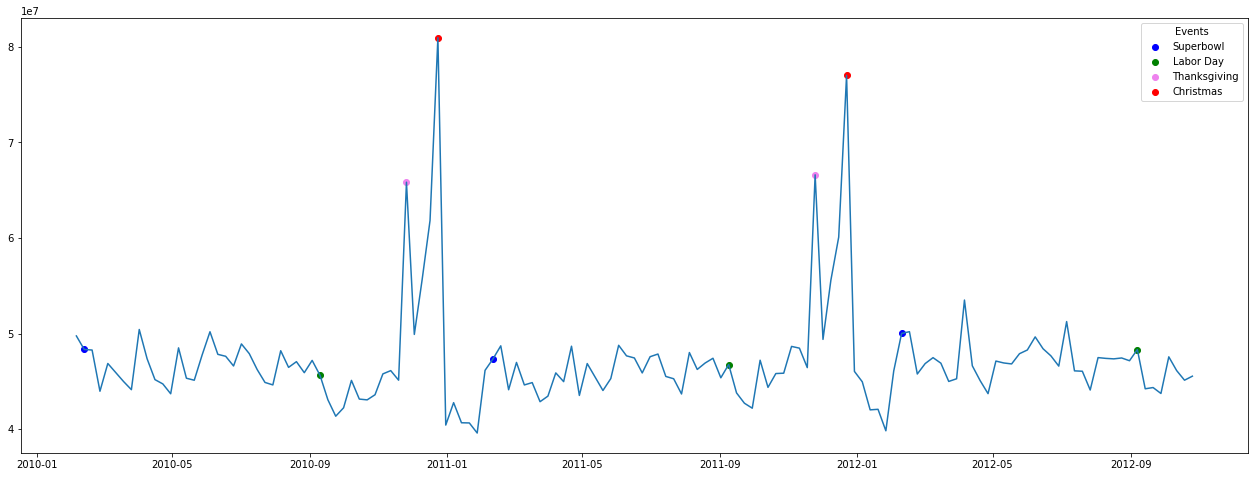

In [54]:
# Walmart Weekly Sales Trend with holiday indicated
weekly_holiday_sales = data.groupby(['Date','IsHoliday'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales['Date'],weekly_sales['Weekly_Sales'])

plt.scatter(holiday_sales[holiday_sales['Holiday'] == 'Superbowl']['Date'].tolist(),holiday_sales[holiday_sales['Holiday'] == 'Superbowl']['Weekly_Sales'].tolist(),marker='o',color='blue',label='Superbowl')
plt.scatter(holiday_sales[holiday_sales['Holiday'] == 'Laborday']['Date'].tolist(),holiday_sales[holiday_sales['Holiday'] == 'Laborday']['Weekly_Sales'].tolist(),marker='o',color='green',label='Labor Day')
plt.scatter(holiday_sales[holiday_sales['Holiday'] == 'Thanksgiving']['Date'].tolist(),holiday_sales[holiday_sales['Holiday'] == 'Thanksgiving']['Weekly_Sales'].tolist(),marker='o',color='violet',label='Thanksgiving')
plt.scatter(holiday_sales[holiday_sales['Holiday'] == 'Christmas']['Date'].tolist(),holiday_sales[holiday_sales['Holiday'] == 'Christmas']['Weekly_Sales'].tolist(),marker='o',color='red',label='Christmas')

plt.legend(title='Events')
plt.show()

In [55]:
non_holiday_sales_mean = weekly_holiday_sales[weekly_holiday_sales.IsHoliday == False]['Weekly_Sales'].mean()
superbowl_sales_mean = holiday_sales[holiday_sales.Holiday == 'Superbowl']['Weekly_Sales'].mean()
superbowl_sales_growth = (superbowl_sales_mean/non_holiday_sales_mean-1)*100
laborday_sales_mean = holiday_sales[holiday_sales.Holiday == 'Laborday']['Weekly_Sales'].mean()
laborday_sales_growth = (laborday_sales_mean/non_holiday_sales_mean-1)*100
thanksgiving_sales_mean = holiday_sales[holiday_sales.Holiday == 'Thanksgiving']['Weekly_Sales'].mean()
thanksgiving_sales_growth = (thanksgiving_sales_mean/non_holiday_sales_mean-1)*100
christmas_sales_mean = holiday_sales[holiday_sales.Holiday == 'Christmas']['Weekly_Sales'].mean()
christmas_sales_growth = (christmas_sales_mean/non_holiday_sales_mean-1)*100

In [56]:
print("Non-Holiday Weekly Sales Mean:")
print(round(non_holiday_sales_mean,2))
print("Superbowl Sales Mean:")
print(round(superbowl_sales_mean,2),"(",round(superbowl_sales_growth,2),"%)")
print("Labor Day Sales Mean:")
print(round(laborday_sales_mean,2),"(",round(laborday_sales_growth,2),"%)")
print("Thanksgiving Sales Mean:")
print(round(thanksgiving_sales_mean,2),"(",round(thanksgiving_sales_growth,2),"%)")
print("Christmas Sales Mean:")
print(round(christmas_sales_mean,2),"(",round(christmas_sales_growth,2),"%)")

Non-Holiday Weekly Sales Mean:
46856537.11
Superbowl Sales Mean:
48560759.45 ( 3.64 %)
Labor Day Sales Mean:
46909228.23 ( 0.11 %)
Thanksgiving Sales Mean:
66207304.25 ( 41.3 %)
Christmas Sales Mean:
78964828.45 ( 68.52 %)


By Store Type Snapshot

In [60]:
# Store Type Weekly Sales
type_weekly_sales = data.groupby(['Date','Type'])['Weekly_Sales'].sum().reset_index()

type_weekly_sales_pivot = type_weekly_sales.pivot(values='Weekly_Sales', index='Date', columns='Type')
type_weekly_sales_pivot.describe()

Type            A           B          C
count      143.00      143.00     143.00
mean  30286816.24 13990914.24 2835689.00
std    3413183.89  2013168.39  130889.46
min   25445540.38 11338263.05 2367502.54
25%   28736252.68 13113181.60 2754897.98
50%   29791614.12 13620722.64 2834134.07
75%   30772452.49 14247542.96 2918617.58
max   51499373.00 26389959.94 3156429.84

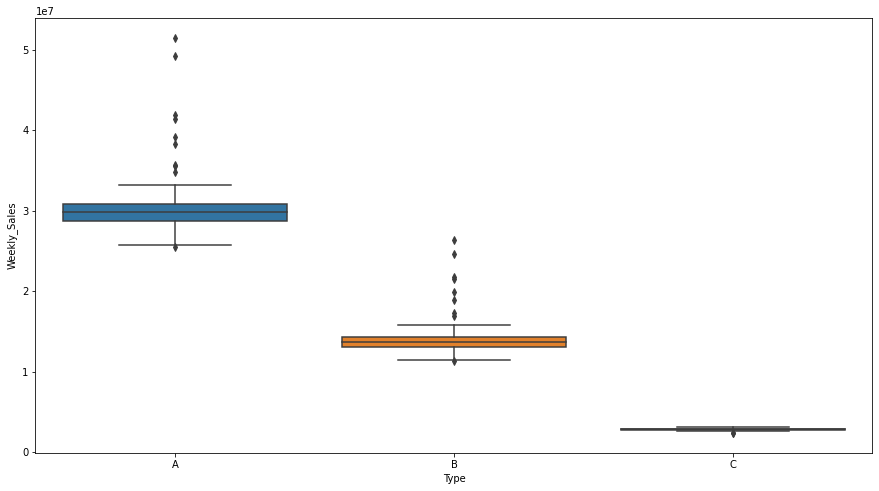

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=type_weekly_sales.Type,y=type_weekly_sales.Weekly_Sales)

In [ ]:
# Store Type Monthly Sales
type_monthly_sales = data.groupby(['Month','Year','Type'])['Weekly_Sales'].sum().reset_index()
type_monthly_sales['Year-Month'] = type_monthly_sales['Year'].astype(str) + "-" + type_monthly_sales['Month'].astype(str)
type_monthly_sales.drop(columns=['Month','Year'],inplace=True)

type_monthly_sales_pivot = type_monthly_sales.pivot(values='Weekly_Sales', index='Year-Month', columns='Type')
type_monthly_sales_pivot.describe()

Type             A           B           C
count        33.00       33.00       33.00
mean  131242870.39 60627295.06 12287985.68
std    19270134.67 10215867.27  1290592.59
min   105482615.54 47127373.04 11059358.86
25%   118640083.30 54471001.43 11223442.81
50%   122056011.24 56189893.04 11652868.02
75%   146414587.03 66109232.45 13750816.30
max   183948894.75 91443513.88 14707931.66

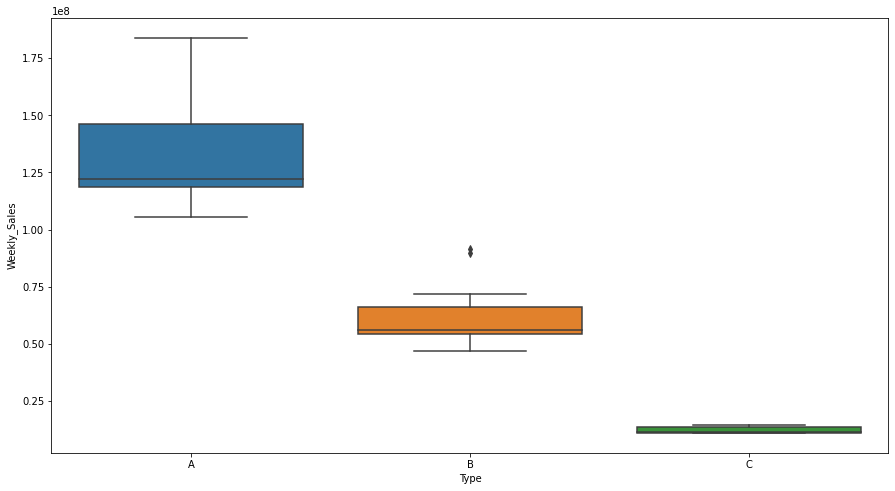

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=type_monthly_sales.Type,y=type_monthly_sales.Weekly_Sales)

In [ ]:
# Store Type Quarterly Sales
type_quarterly_sales = data.groupby(['Quarter','Year','Type'])['Weekly_Sales'].sum().reset_index()
type_quarterly_sales['Year-Quarter'] = type_quarterly_sales['Year'].astype(str) + "-" + type_quarterly_sales['Quarter'].astype(str)
type_quarterly_sales.drop(columns=['Quarter','Year'],inplace=True)

type_quarterly_sales_pivot = type_quarterly_sales.pivot(values='Weekly_Sales', index='Year-Quarter', columns='Type')
type_quarterly_sales_pivot.describe()

Type             A            B           C
count        12.00        12.00       12.00
mean  360917893.56 166725061.40 33791960.63
std    93378464.25  44013472.89  8274485.80
min   118640083.30  53971520.17 11750076.95
25%   371551500.66 167850093.05 35626938.95
50%   387487636.00 178352720.61 36869512.71
75%   401929022.87 184281586.28 38310564.45
max   453791613.81 216412152.61 38571960.46

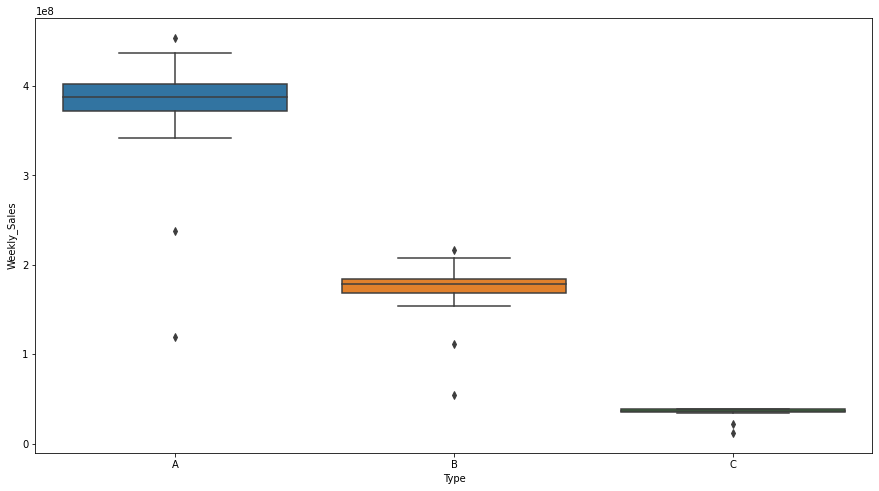

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=type_quarterly_sales.Type,y=type_quarterly_sales.Weekly_Sales)

In [ ]:
# Store Type Yearly Sales
type_yearly_sales = data.groupby(['Year','Type'])['Weekly_Sales'].sum().reset_index()

type_yearly_sales_pivot = type_yearly_sales.pivot(values='Weekly_Sales', index='Year', columns='Type')
type_yearly_sales_pivot.describe()

Type              A            B            C
count          3.00         3.00         3.00
mean  1443671574.25 666900245.61 135167842.51
std    146631607.12  71603225.17   9968328.33
min   1287376394.08 586603999.51 126152465.76
25%   1376403406.11 638290867.71 129815216.06
50%   1465430418.14 689977735.91 133477966.36
75%   1521819164.34 707048368.65 139675530.89
max   1578207910.53 724119001.40 145873095.42

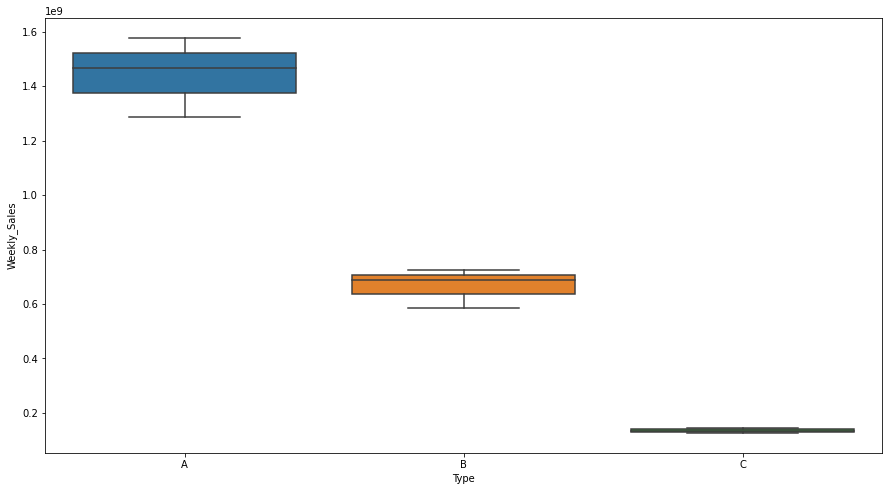

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x=type_yearly_sales.Type,y=type_yearly_sales.Weekly_Sales)

In [57]:
#Create dataframe of store holidays weekly sales
type_weekly_holiday_sales = data.groupby(['Date','IsHoliday','Type'])['Weekly_Sales'].sum().reset_index()
type_weekly_holiday_sales

Date  IsHoliday Type  Weekly_Sales
0   2010-02-05      False    A   32144126.25
1   2010-02-05      False    B   14775498.62
2   2010-02-05      False    C    2831115.63
3   2010-02-12       True    A   30982570.79
4   2010-02-12       True    B   14439178.59
..         ...        ...  ...           ...
424 2012-10-19      False    B   13363404.25
425 2012-10-19      False    C    2907405.83
426 2012-10-26      False    A   29128295.31
427 2012-10-26      False    B   13560940.97
428 2012-10-26      False    C    2854880.01

[429 rows x 4 columns]

In [58]:
#Create dataframe of store holidays sales
type_holiday_sales = type_weekly_holiday_sales.merge(holidays, on=['Date'], how='inner')
type_holiday_sales

Date  IsHoliday Type  Weekly_Sales       Holiday
0  2010-02-12       True    A   30982570.79     Superbowl
1  2010-02-12       True    B   14439178.59     Superbowl
2  2010-02-12       True    C    2914928.25     Superbowl
3  2010-09-10       True    A   29342102.37      Laborday
4  2010-09-10       True    B   13395942.58      Laborday
5  2010-09-10       True    C    2896352.89      Laborday
6  2010-11-26       True    A   41448457.21  Thanksgiving
7  2010-11-26       True    B   21567271.42  Thanksgiving
8  2010-11-26       True    C    2805274.61  Thanksgiving
9  2010-12-24      False    A   51499373.00     Christmas
10 2010-12-24      False    B   26389959.94     Christmas
11 2010-12-24      False    C    3042082.66     Christmas
12 2011-02-11       True    A   30527148.15     Superbowl
13 2011-02-11       True    B   13866735.03     Superbowl
14 2011-02-11       True    C    2942309.61     Superbowl
15 2011-09-09       True    A   30276540.33      Laborday
16 2011-09-09       True    B   13658413.54      Laborday
17 2011-09-09       True    C    2828273.66      Laborday
18 2011-11-25       True    A   41922781.18  Thanksgiving
19 2011-11-25       True    B   21745597.80  Thanksgiving
20 2011-11-25       True    C    2925226.28  Thanksgiving
21 2011-12-23      False    A   49252109.29     Christmas
22 2011-12-23      False    B   24600399.99     Christmas
23 2011-12-23      False    C    3145732.03     Christmas
24 2012-02-10       True    A   32319489.11     Superbowl
25 2012-02-10       True    B   14579227.91     Superbowl
26 2012-02-10       True    C    3110690.90     Superbowl
27 2012-09-07       True    A   31179614.88      Laborday
28 2012-09-07       True    B   14079808.84      Laborday
29 2012-09-07       True    C    3070635.59      Laborday

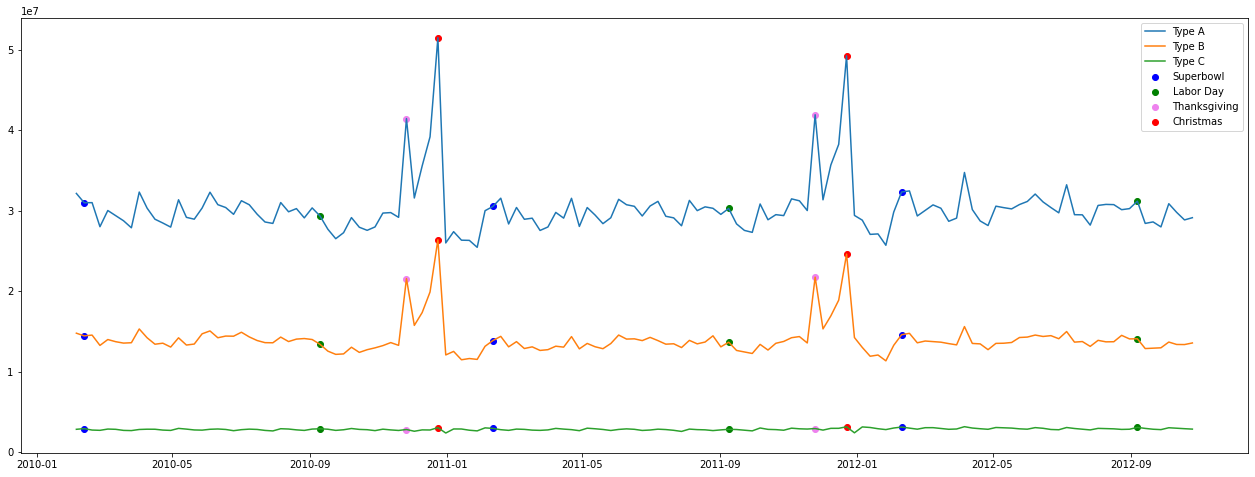

In [61]:
# Store Weekly Sales Trend with holiday indicated
plt.figure(figsize=(22,8))

plt.plot('Date','Weekly_Sales',data=type_weekly_sales[type_weekly_sales['Type']=="A"],label='Type A')
plt.plot('Date','Weekly_Sales',data=type_weekly_sales[type_weekly_sales['Type']=="B"],label='Type B')
plt.plot('Date','Weekly_Sales',data=type_weekly_sales[type_weekly_sales['Type']=="C"],label='Type C')

plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Weekly_Sales'].tolist(),marker='o',color='blue',label='Superbowl')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Laborday')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Laborday')]['Weekly_Sales'].tolist(),marker='o',color='green',label='Labor Day')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Weekly_Sales'].tolist(),marker='o',color='violet',label='Thanksgiving')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Christmas')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Christmas')]['Weekly_Sales'].tolist(),marker='o',color='red',label='Christmas')

plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Weekly_Sales'].tolist(),marker='o',color='blue')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Laborday')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Laborday')]['Weekly_Sales'].tolist(),marker='o',color='green')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Weekly_Sales'].tolist(),marker='o',color='violet')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Christmas')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Christmas')]['Weekly_Sales'].tolist(),marker='o',color='red')

plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Weekly_Sales'].tolist(),marker='o',color='blue')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Laborday')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Laborday')]['Weekly_Sales'].tolist(),marker='o',color='green')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Weekly_Sales'].tolist(),marker='o',color='violet')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Christmas')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Christmas')]['Weekly_Sales'].tolist(),marker='o',color='red')

plt.legend()
plt.show()

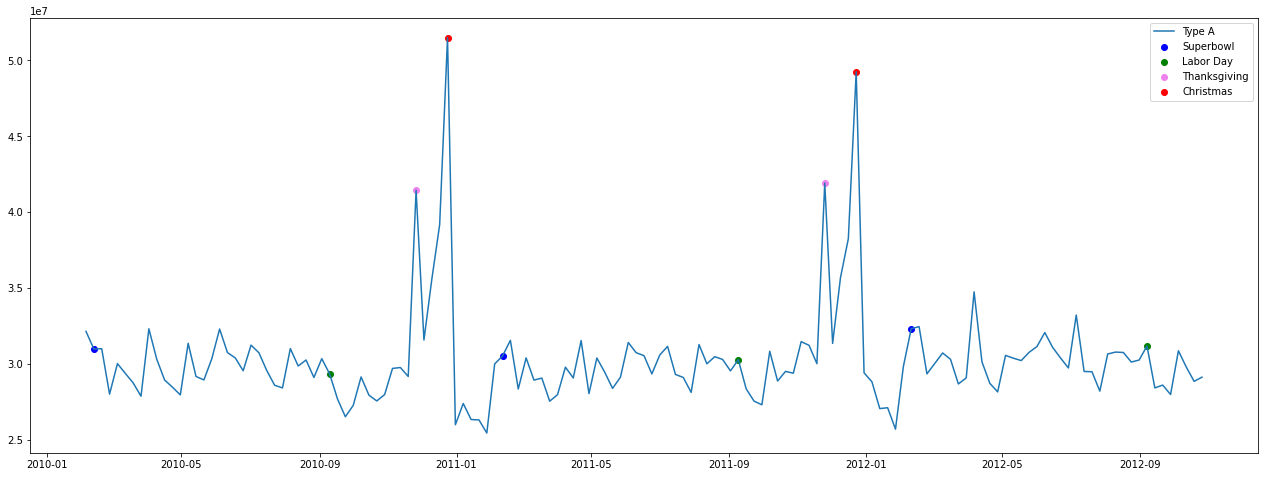

In [62]:
# Store A Weekly Sales Trend with holiday indicated
plt.figure(figsize=(22,8))

plt.plot('Date','Weekly_Sales',data=type_weekly_sales[type_weekly_sales['Type']=="A"],label='Type A')

plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Weekly_Sales'].tolist(),marker='o',color='blue',label='Superbowl')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Laborday')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Laborday')]['Weekly_Sales'].tolist(),marker='o',color='green',label='Labor Day')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Weekly_Sales'].tolist(),marker='o',color='violet',label='Thanksgiving')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Christmas')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="A") & (type_holiday_sales['Holiday'] == 'Christmas')]['Weekly_Sales'].tolist(),marker='o',color='red',label='Christmas')

plt.legend()
plt.show()

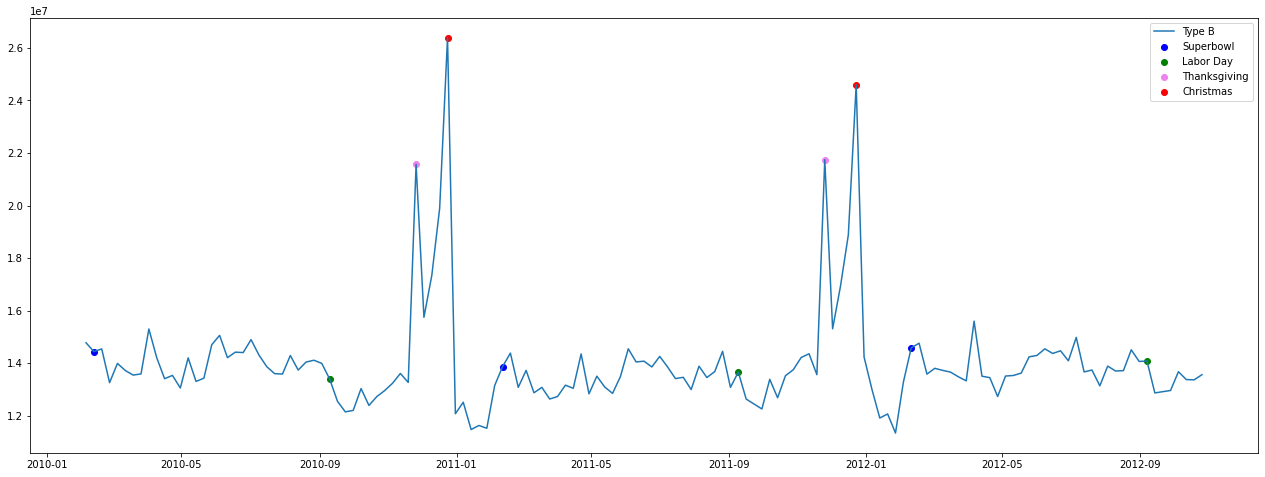

In [63]:
# Store B Weekly Sales Trend with holiday indicated
plt.figure(figsize=(22,8))
 
plt.plot('Date','Weekly_Sales',data=type_weekly_sales[type_weekly_sales['Type']=="B"],label='Type B')
 
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Weekly_Sales'].tolist(),marker='o',color='blue',label='Superbowl')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Laborday')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Laborday')]['Weekly_Sales'].tolist(),marker='o',color='green',label='Labor Day')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Weekly_Sales'].tolist(),marker='o',color='violet',label='Thanksgiving')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Christmas')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="B") & (type_holiday_sales['Holiday'] == 'Christmas')]['Weekly_Sales'].tolist(),marker='o',color='red',label='Christmas')
 
plt.legend()
plt.show()

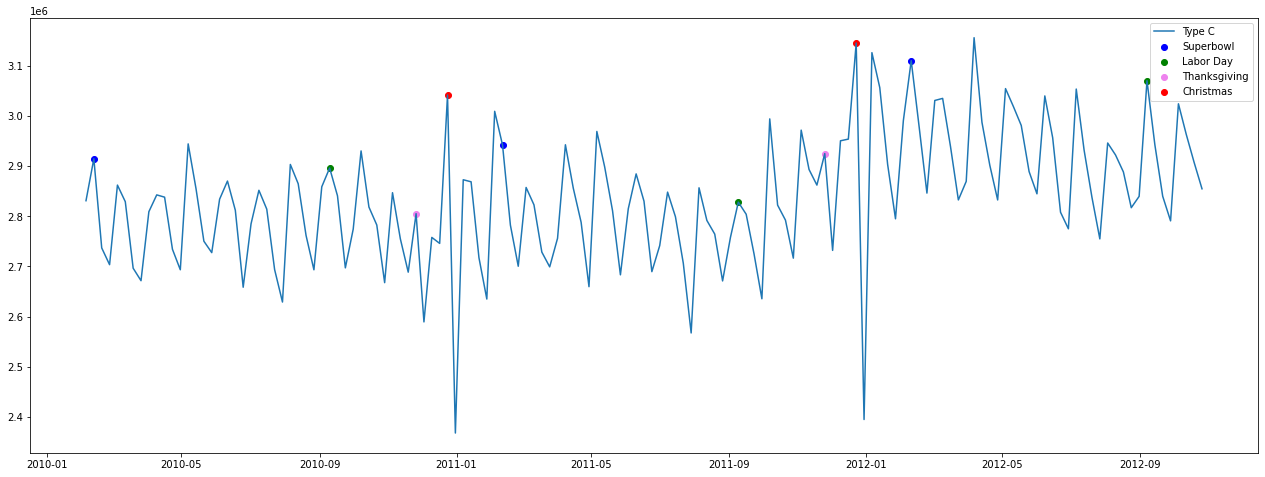

In [64]:
# Store C Weekly Sales Trend with holiday indicated
plt.figure(figsize=(22,8))

plt.plot('Date','Weekly_Sales',data=type_weekly_sales[type_weekly_sales['Type']=="C"],label='Type C')

plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Superbowl')]['Weekly_Sales'].tolist(),marker='o',color='blue',label='Superbowl')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Laborday')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Laborday')]['Weekly_Sales'].tolist(),marker='o',color='green',label='Labor Day')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Thanksgiving')]['Weekly_Sales'].tolist(),marker='o',color='violet',label='Thanksgiving')
plt.scatter(type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Christmas')]['Date'].tolist(),type_holiday_sales[(type_holiday_sales['Type']=="C") & (type_holiday_sales['Holiday'] == 'Christmas')]['Weekly_Sales'].tolist(),marker='o',color='red',label='Christmas')

plt.legend()
plt.show()

In [ ]:
#Store A Holiday Sales
A_non_holiday_sales_mean = type_weekly_holiday_sales[(type_weekly_holiday_sales.IsHoliday == False) & (type_weekly_holiday_sales.Type == "A")]['Weekly_Sales'].mean()

A_superbowl_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Superbowl') & (type_weekly_holiday_sales.Type == "A")]['Weekly_Sales'].mean()
A_superbowl_sales_growth = (A_superbowl_sales_mean/A_non_holiday_sales_mean-1)*100

A_laborday_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Laborday') & (type_weekly_holiday_sales.Type == "A")]['Weekly_Sales'].mean()
A_laborday_sales_growth = (A_laborday_sales_mean/A_non_holiday_sales_mean-1)*100

A_thanksgiving_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Thanksgiving') & (type_weekly_holiday_sales.Type == "A")]['Weekly_Sales'].mean()
A_thanksgiving_sales_growth = (A_thanksgiving_sales_mean/A_non_holiday_sales_mean-1)*100

A_christmas_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Christmas') & (type_weekly_holiday_sales.Type == "A")]['Weekly_Sales'].mean()
A_christmas_sales_growth = (A_christmas_sales_mean/A_non_holiday_sales_mean-1)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [67]:
print("Store A Non-Holiday Weekly Sales Mean:")
print(round(A_non_holiday_sales_mean,2))
print("Store A Superbowl Sales Mean:")
print(round(A_superbowl_sales_mean,2),"(",round(A_superbowl_sales_growth,2),"%)")
print("Store A Labor Day Sales Mean:")
print(round(A_laborday_sales_mean,2),"(",round(A_laborday_sales_growth,2),"%)")
print("Store A Thanksgiving Sales Mean:")
print(round(A_thanksgiving_sales_mean,2),"(",round(A_thanksgiving_sales_growth,2),"%)")
print("Store A Christmas Sales Mean:")
print(round(A_christmas_sales_mean,2),"(",round(A_christmas_sales_growth,2),"%)")

Store A Non-Holiday Weekly Sales Mean:


NameError: ignored

In [ ]:
#Store B Holiday Sales
B_non_holiday_sales_mean = type_weekly_holiday_sales[(type_weekly_holiday_sales.IsHoliday == False) & (type_weekly_holiday_sales.Type == "B")]['Weekly_Sales'].mean()
 
B_superbowl_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Superbowl') & (type_weekly_holiday_sales.Type == "B")]['Weekly_Sales'].mean()
B_superbowl_sales_growth = (B_superbowl_sales_mean/B_non_holiday_sales_mean-1)*100
 
B_laborday_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Laborday') & (type_weekly_holiday_sales.Type == "B")]['Weekly_Sales'].mean()
B_laborday_sales_growth = (B_laborday_sales_mean/B_non_holiday_sales_mean-1)*100
 
B_thanksgiving_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Thanksgiving') & (type_weekly_holiday_sales.Type == "B")]['Weekly_Sales'].mean()
B_thanksgiving_sales_growth = (B_thanksgiving_sales_mean/B_non_holiday_sales_mean-1)*100
 
B_christmas_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Christmas') & (type_weekly_holiday_sales.Type == "B")]['Weekly_Sales'].mean()
B_christmas_sales_growth = (B_christmas_sales_mean/B_non_holiday_sales_mean-1)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [ ]:
print("Store B Non-Holiday Weekly Sales Mean:")
print(round(B_non_holiday_sales_mean,2))
print("Store B Superbowl Sales Mean:")
print(round(B_superbowl_sales_mean,2),"(",round(B_superbowl_sales_growth,2),"%)")
print("Store B Labor Day Sales Mean:")
print(round(B_laborday_sales_mean,2),"(",round(B_laborday_sales_growth,2),"%)")
print("Store B Thanksgiving Sales Mean:")
print(round(B_thanksgiving_sales_mean,2),"(",round(B_thanksgiving_sales_growth,2),"%)")
print("Store B Christmas Sales Mean:")
print(round(B_christmas_sales_mean,2),"(",round(B_christmas_sales_growth,2),"%)")

Store B Non-Holiday Weekly Sales Mean:
13887666.89
Store B Superbowl Sales Mean:
14295047.18 ( 2.93 %)
Store B Labor Day Sales Mean:
13711388.32 ( -1.27 %)
Store B Thanksgiving Sales Mean:
21656434.61 ( 55.94 %)
Store B Christmas Sales Mean:
13154432.48 ( -5.28 %)


In [ ]:
#Store C Holiday Sales
C_non_holiday_sales_mean = type_weekly_holiday_sales[(type_weekly_holiday_sales.IsHoliday == False) & (type_weekly_holiday_sales.Type == "C")]['Weekly_Sales'].mean()
C_superbowl_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Superbowl') & (type_weekly_holiday_sales.Type == "C")]['Weekly_Sales'].mean()
C_superbowl_sales_growth = (C_superbowl_sales_mean/C_non_holiday_sales_mean-1)*100
C_laborday_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Laborday') & (type_weekly_holiday_sales.Type == "C")]['Weekly_Sales'].mean()
C_laborday_sales_growth = (C_laborday_sales_mean/C_non_holiday_sales_mean-1)*100
C_thanksgiving_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Thanksgiving') & (type_weekly_holiday_sales.Type == "C")]['Weekly_Sales'].mean()
C_thanksgiving_sales_growth = (C_thanksgiving_sales_mean/C_non_holiday_sales_mean-1)*100
C_christmas_sales_mean = type_holiday_sales[(type_holiday_sales.Holiday == 'Christmas') & (type_weekly_holiday_sales.Type == "C")]['Weekly_Sales'].mean()
C_christmas_sales_growth = (C_christmas_sales_mean/C_non_holiday_sales_mean-1)*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [ ]:
print("Store C Non-Holiday Weekly Sales Mean:")
print(round(C_non_holiday_sales_mean,2))
print("Store C Superbowl Sales Mean:")
print(round(C_superbowl_sales_mean,2),"(",round(C_superbowl_sales_growth,2),"%)")
print("Store C Labor Day Sales Mean:")
print(round(C_laborday_sales_mean,2),"(",round(C_laborday_sales_growth,2),"%)")
print("Store C Thanksgiving Sales Mean:")
print(round(C_thanksgiving_sales_mean,2),"(",round(C_thanksgiving_sales_growth,2),"%)")
print("Store C Christmas Sales Mean:")
print(round(C_christmas_sales_mean,2),"(",round(C_christmas_sales_growth,2),"%)")

Store C Non-Holiday Weekly Sales Mean:
2836449.81
Store C Superbowl Sales Mean:
2989309.59 ( 5.39 %)
Store C Labor Day Sales Mean:
2931754.05 ( 3.36 %)
Store C Thanksgiving Sales Mean:
2865250.44 ( 1.02 %)
Store C Christmas Sales Mean:
2381005.46 ( -16.06 %)


By Dept Snapshot

In [ ]:
# Dept Weekly Sales
dept_weekly_sales = data.groupby(['Date','Dept'])['Weekly_Sales'].sum().reset_index()

dept_weekly_sales_pivot = dept_weekly_sales.pivot(values='Weekly_Sales', index='Date', columns='Dept')
dept_weekly_sales_pivot.describe()

Dept          1          2          3   ...        97        98       99
count     143.00     143.00     143.00  ...    143.00    143.00    94.00
mean   864606.83 1962315.91  530716.43  ... 625849.73 278523.91  3810.10
std    403192.21  141426.44  345132.72  ...  48602.89  39492.94 12720.36
min    523274.28 1545570.50  301441.53  ... 516222.42 220397.35  -147.00
25%    637815.86 1877629.67  348108.46  ... 595586.19 255764.48     1.23
50%    681391.58 1957167.66  377171.80  ... 626941.05 268598.26    55.73
75%    898448.70 2023822.48  514190.95  ... 657379.88 287613.49  1146.25
max   2492989.92 2846582.63 1816910.19  ... 764413.36 443236.24 77279.49

[8 rows x 81 columns]

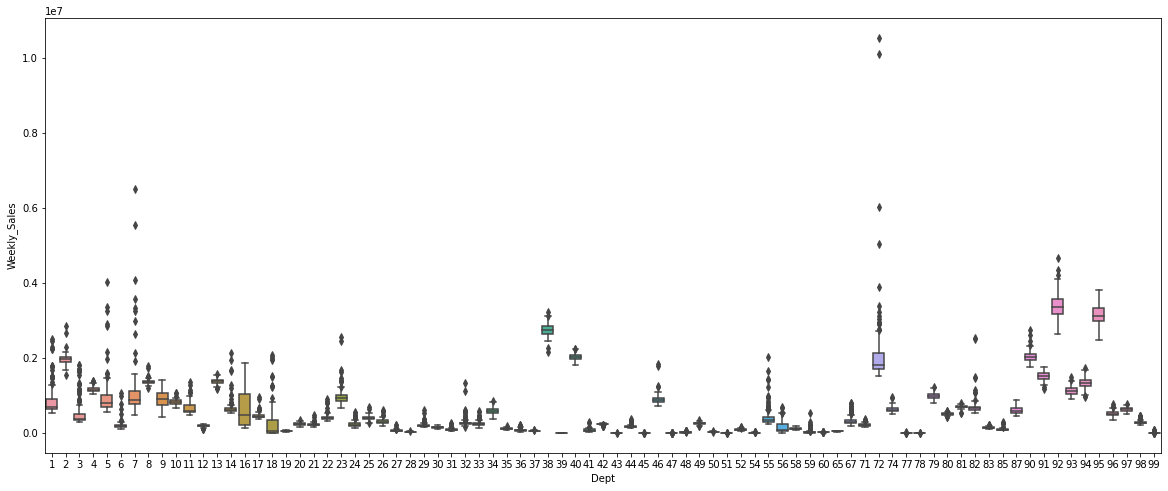

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x=dept_weekly_sales.Dept,y=dept_weekly_sales.Weekly_Sales)

In [ ]:
# Dept Monthly Sales
dept_monthly_sales = data.groupby(['Month','Year','Dept'])['Weekly_Sales'].sum().reset_index()
dept_monthly_sales['Year-Month'] = dept_monthly_sales['Year'].astype(str) + "-" + dept_monthly_sales['Month'].astype(str)
dept_monthly_sales.drop(columns=['Month','Year'],inplace=True)
 
dept_monthly_sales_pivot = dept_monthly_sales.pivot(values='Weekly_Sales', index='Year-Month', columns='Dept')
dept_monthly_sales_pivot.describe()

Dept          1           2          3   ...         97         98        99
count      33.00       33.00      33.00  ...      33.00      33.00     28.00
mean  3746629.59  8503368.92 2299771.21  ... 2712015.51 1206936.95  12791.07
std   1365743.70  1139255.26 1429695.81  ...  313219.72  173761.17  32471.18
min   2372544.38  6958418.94 1264467.34  ... 2277942.99  962940.43   -145.38
25%   2612908.90  7658267.17 1444555.75  ... 2477646.46 1083239.03     26.40
50%   3251063.33  7879605.83 1789021.59  ... 2602515.71 1171256.97   1021.03
75%   4363447.50  9659660.67 2551783.78  ... 3000286.74 1308726.79   7658.43
max   7137958.51 10907189.61 7373491.01  ... 3344507.83 1686723.60 152578.06

[8 rows x 81 columns]

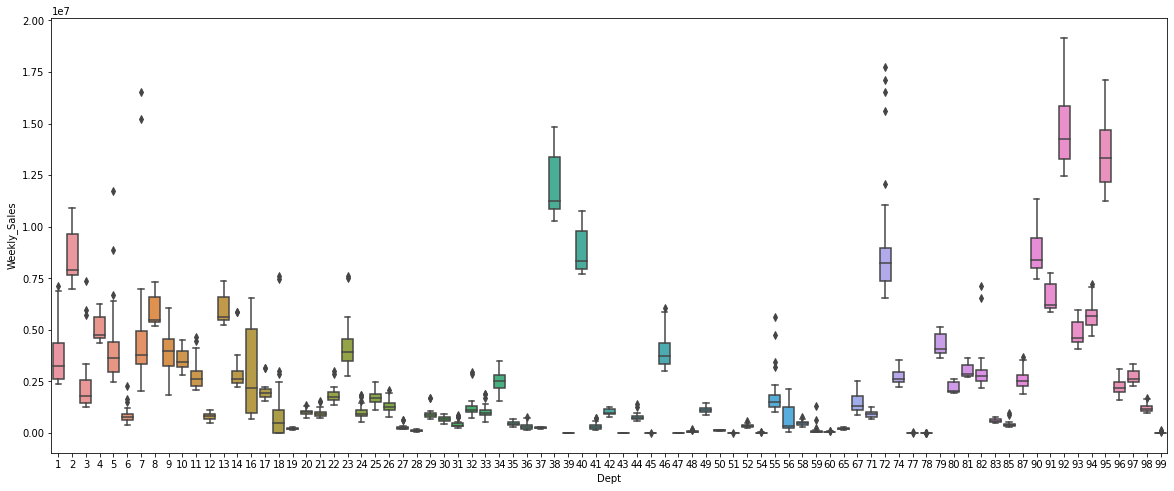

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x=dept_monthly_sales.Dept,y=dept_monthly_sales.Weekly_Sales)

In [ ]:
# Store Dept Quarterly Sales
dept_quarterly_sales = data.groupby(['Quarter','Year','Dept'])['Weekly_Sales'].sum().reset_index()
dept_quarterly_sales['Year-Quarter'] = dept_quarterly_sales['Year'].astype(str) + "-" + dept_quarterly_sales['Quarter'].astype(str)
dept_quarterly_sales.drop(columns=['Quarter','Year'],inplace=True)
 
dept_quarterly_sales_pivot = dept_quarterly_sales.pivot(values='Weekly_Sales', index='Year-Quarter', columns='Dept')
dept_quarterly_sales_pivot.describe()

Dept           1           2           3   ...         97         98        99
count       12.00       12.00       12.00  ...      12.00      12.00     12.00
mean  10303231.38 23384264.54  6324370.83  ... 7458042.66 3319076.61  29845.82
std    3198872.29  5984965.70  3620851.23  ... 1904257.93  839199.65  65163.92
min    4124433.16  7594585.85  1423605.05  ... 2570324.74 1171256.97   -154.37
25%    8701426.90 24292875.06  4406174.25  ... 7774307.26 3288029.89    180.05
50%   10148728.41 25612243.00  5246938.88  ... 8097307.42 3511456.24   8701.39
75%   11500026.29 26397971.16  7197498.70  ... 8414732.28 3633403.26  16955.59
max   15794198.68 28104653.90 12372526.10  ... 9184786.69 4342477.26 230852.66

[8 rows x 81 columns]

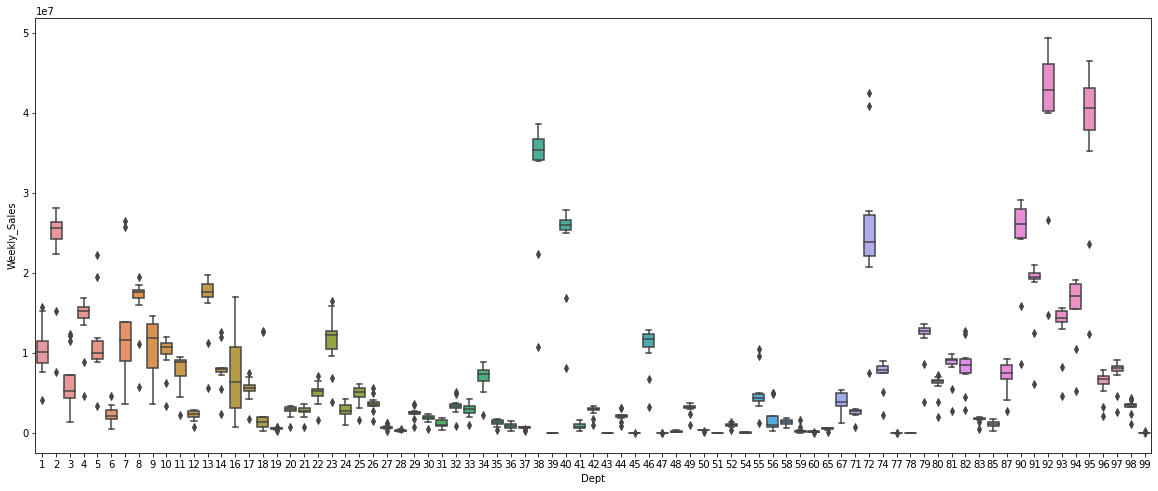

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x=dept_quarterly_sales.Dept,y=dept_quarterly_sales.Weekly_Sales)

In [ ]:
# Store Dept Yearly Sales
dept_yearly_sales = data.groupby(['Year','Dept'])['Weekly_Sales'].sum().reset_index()
 
dept_yearly_sales_pivot = dept_yearly_sales.pivot(values='Weekly_Sales', index='Year', columns='Dept')
dept_yearly_sales_pivot.describe()

Dept           1            2           3   ...          97          98        99
count        3.00         3.00        3.00  ...        3.00        3.00      3.00
mean  41212925.51  93537058.14 25297483.32  ... 29832170.63 13276306.46 119383.28
std    5149119.41   8238257.50  1627400.91  ...  2623466.41  1595531.54 133180.38
min   35445927.76  85052985.88 23783096.65  ... 27400974.26 11504648.80    156.80
25%   39144731.07  89552959.63 24437116.86  ... 28441821.36 12614506.95  47517.78
50%   42843534.38  94052933.38 25091137.08  ... 29482668.45 13724365.09  94878.76
75%   44096424.39  97779094.28 26054676.65  ... 31047768.82 14162135.29 178996.52
max   45349314.40 101505255.17 27018216.22  ... 32612869.19 14599905.48 263114.29

[8 rows x 81 columns]

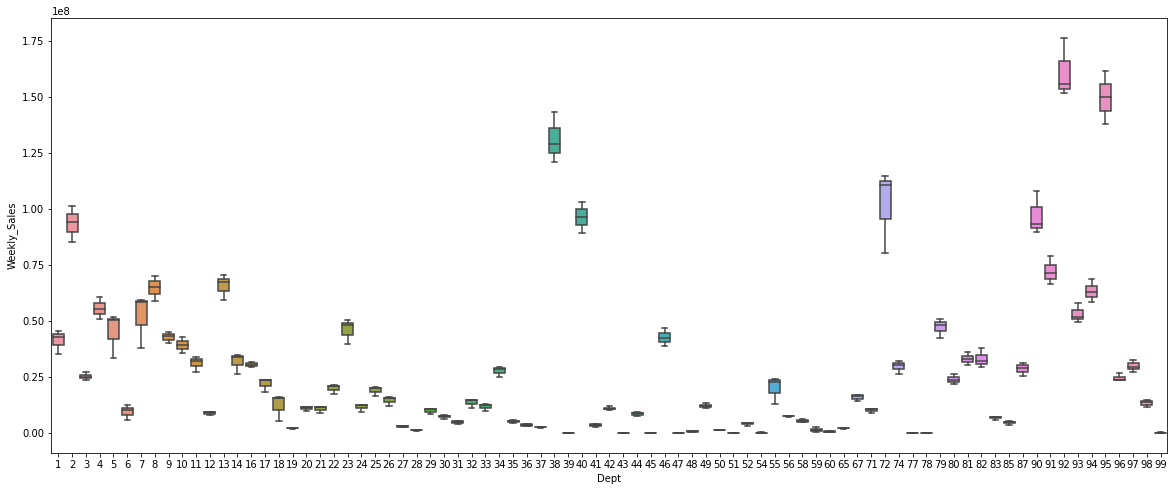

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x=dept_yearly_sales.Dept,y=dept_yearly_sales.Weekly_Sales)

### Other Findings
Least priority maybe

In [11]:
data.isnull().sum()

Store                  0
Dept                   0
Date                   0
Weekly_Sales           0
IsHoliday              0
Temperature            0
Fuel_Price             0
MarkDown1         270889
MarkDown2         310322
MarkDown3         284479
MarkDown4         286603
MarkDown5         270138
CPI                    0
Unemployment           0
Type                   0
Size                   0
Total_MarkDown    324514
Year                   0
Quarter                0
Month                  0
Week                   0
Type_Numeric           0
dtype: int64

In [14]:
data.fillna(0,inplace=True)

In [15]:
data.isnull().sum()

Store             0
Dept              0
Date              0
Weekly_Sales      0
IsHoliday         0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI               0
Unemployment      0
Type              0
Size              0
Total_MarkDown    0
Year              0
Quarter           0
Month             0
Week              0
Type_Numeric      0
dtype: int64

In [42]:
#Create dataframe of markdown weekly sales
markdown1_sales = data[(data.MarkDown1 != 0)].groupby(['Date'])['Weekly_Sales'].sum().reset_index()
markdown2_sales = data[(data.MarkDown2 != 0)].groupby(['Date'])['Weekly_Sales'].sum().reset_index()
markdown3_sales = data[(data.MarkDown3 != 0)].groupby(['Date'])['Weekly_Sales'].sum().reset_index()
markdown4_sales = data[(data.MarkDown4 != 0)].groupby(['Date'])['Weekly_Sales'].sum().reset_index()
markdown5_sales = data[(data.MarkDown5 != 0)].groupby(['Date'])['Weekly_Sales'].sum().reset_index()

In [43]:
markdown2_sales

Date  Weekly_Sales
0  2011-11-11   48474224.75
1  2011-11-18   46128449.52
2  2011-11-25   58337968.85
3  2011-12-02   39666488.82
4  2011-12-09   41356156.34
5  2011-12-16   49661755.06
6  2011-12-23   73271011.63
7  2011-12-30   46042461.04
8  2012-01-06   44955421.95
9  2012-01-13   42023078.48
10 2012-01-20   42080996.56
11 2012-01-27   39401937.01
12 2012-02-03   46085608.09
13 2012-02-10   49347209.27
14 2012-02-17   50197056.96
15 2012-02-24   45771506.57
16 2012-03-02   46544347.75
17 2012-03-09   47033836.22
18 2012-03-16   45494214.52
19 2012-03-23   41954413.62
20 2012-03-30   43603153.25
21 2012-04-06    6190465.64
22 2012-04-13   46629261.41
23 2012-04-20   45072529.78
24 2012-04-27   32505852.66
25 2012-05-04    6418531.16
26 2012-05-11    6828392.31
27 2012-05-18    2039222.26
28 2012-05-25    3169875.28
29 2012-06-01   35331530.15
30 2012-06-08   44201608.92
31 2012-06-15   43400672.56
32 2012-06-22   44292138.86
33 2012-06-29   43286188.83
34 2012-07-06   47618832.40
35 2012-07-13   41220164.76
36 2012-07-20   41824212.33
37 2012-07-27   38187831.61
38 2012-08-03   40586463.28
39 2012-08-10   41115637.40
40 2012-08-17   40108470.67
41 2012-08-24   38741569.84
42 2012-08-31   39223882.87
43 2012-09-07   40081191.88
44 2012-09-14   13672119.70
45 2012-09-21   40968046.16
46 2012-09-28   37838231.55
47 2012-10-26   45544116.29

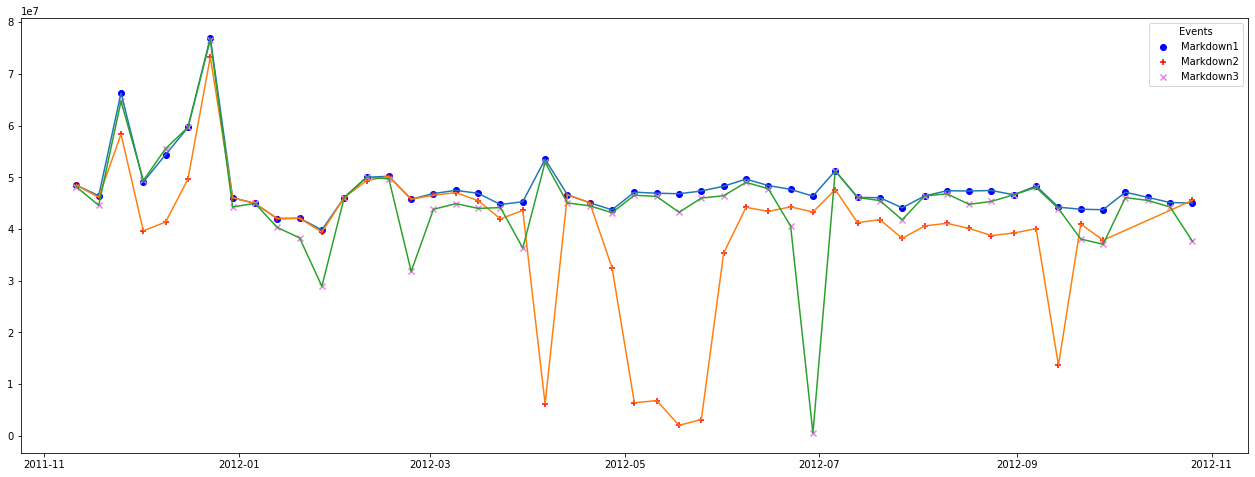

In [47]:
# Walmart Weekly Sales Trend with markdown2 indicated
plt.figure(figsize=(22,8))
plt.plot(markdown1_sales['Date'],markdown1_sales['Weekly_Sales'])
plt.plot(markdown2_sales['Date'],markdown2_sales['Weekly_Sales'])
plt.plot(markdown3_sales['Date'],markdown3_sales['Weekly_Sales'])
plt.scatter(markdown1_sales['Date'],markdown1_sales['Weekly_Sales'],marker='o',color='blue',label='Markdown1')
plt.scatter(markdown2_sales['Date'],markdown2_sales['Weekly_Sales'],marker='+',color='red',label='Markdown2')
plt.scatter(markdown3_sales['Date'],markdown3_sales['Weekly_Sales'],marker='x',color='violet',label='Markdown3')
plt.legend(title='Events')
plt.show()

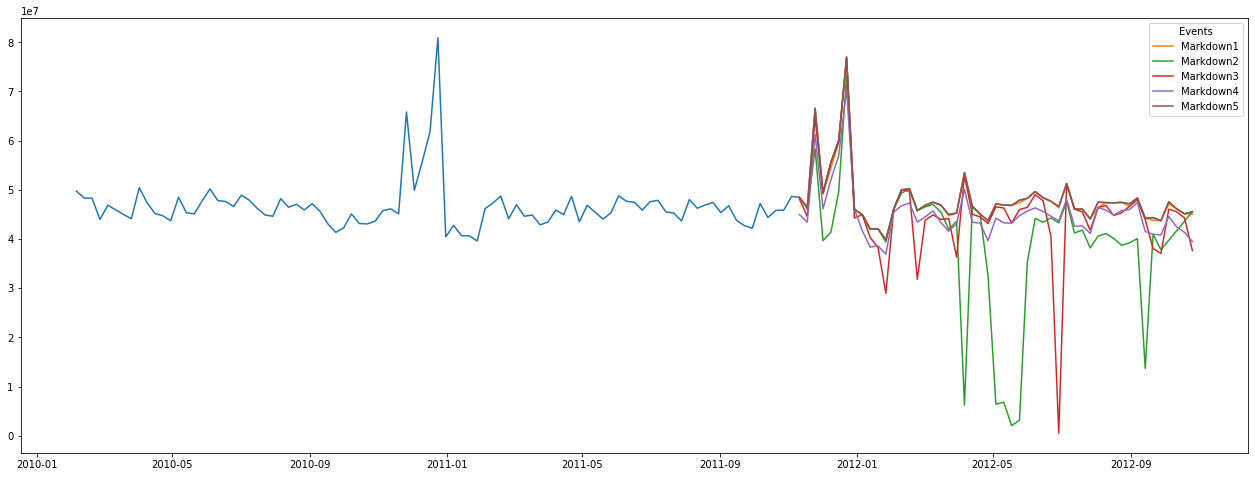

In [50]:
# Walmart Weekly Sales Trend with markdown indicated
plt.figure(figsize=(22,8))
plt.plot(weekly_sales['Date'],weekly_sales['Weekly_Sales'])
plt.plot(markdown1_sales['Date'],markdown1_sales['Weekly_Sales'],label='Markdown1')
plt.plot(markdown2_sales['Date'],markdown2_sales['Weekly_Sales'],label='Markdown2')
plt.plot(markdown3_sales['Date'],markdown3_sales['Weekly_Sales'],label='Markdown3')
plt.plot(markdown4_sales['Date'],markdown4_sales['Weekly_Sales'],label='Markdown4')
plt.plot(markdown5_sales['Date'],markdown5_sales['Weekly_Sales'],label='Markdown5')

#plt.scatter(markdown1_sales['Date'],markdown1_sales['Weekly_Sales'],marker='o',color='blue',label='Markdown1')
#plt.scatter(markdown2_sales['Date'],markdown2_sales['Weekly_Sales'],marker='+',color='red',label='Markdown2')
#plt.scatter(markdown3_sales['Date'],markdown3_sales['Weekly_Sales'],marker='x',color='violet',label='Markdown3')
#plt.scatter(markdown4_sales['Date'],markdown4_sales['Weekly_Sales'],marker='v',color='green',label='Markdown4')
#plt.scatter(markdown5_sales['Date'],markdown5_sales['Weekly_Sales'],marker='.',color='yellow',label='Markdown5')

plt.legend(title='Events')
plt.show()

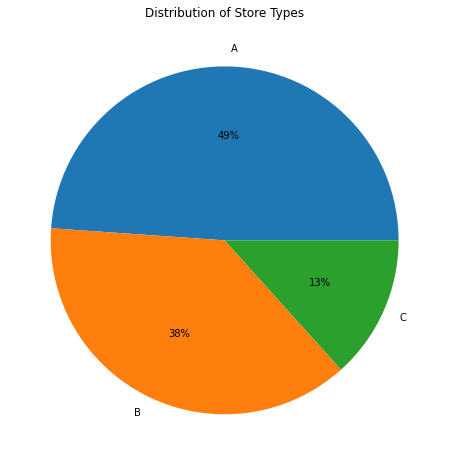

In [ ]:
#Store Types Distribution
plt.figure(figsize=(8,8))
store_type_dist = stores.groupby('Type')['Store'].count().reset_index()

plt.pie(data=store_type_dist, x='Store', labels = 'Type', autopct='%.0f%%')
plt.title("Distribution of Store Types")
plt.show()

In [ ]:
# Weekly Sales by Store by Dept
train_df['Weekly_Sales'].describe().to_frame()

Weekly_Sales
count     421570.00
mean       15981.26
std        22711.18
min        -4988.94
25%         2079.65
50%         7612.03
75%        20205.85
max       693099.36

In [ ]:
# Weekly Sales by Store
store_weekly_sales = train_df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()
store_weekly_sales.rename(columns={'Weekly_Sales': 'Weekly_Sales_by_Store'}, inplace=True)
store_weekly_sales
#store_weekly_sales['Weekly_Sales_by_Store'].describe().to_frame()

Store       Date  Weekly_Sales_by_Store
0         1 2010-02-05             1643690.90
1         1 2010-02-12             1641957.44
2         1 2010-02-19             1611968.17
3         1 2010-02-26             1409727.59
4         1 2010-03-05             1554806.68
...     ...        ...                    ...
6430     45 2012-09-28              713173.95
6431     45 2012-10-05              733455.07
6432     45 2012-10-12              734464.36
6433     45 2012-10-19              718125.53
6434     45 2012-10-26              760281.43

[6435 rows x 3 columns]

In [ ]:
# Weekly Sales by Dept
dept_weekly_sales = train_df.groupby(['Dept', 'Date'])['Weekly_Sales'].sum().reset_index()
dept_weekly_sales.rename(columns={'Weekly_Sales': 'Weekly_Sales_by_Dept'}, inplace=True)
dept_weekly_sales
#dept_weekly_sales['Weekly_Sales_by_Dept'].describe().to_frame()

Dept       Date  Weekly_Sales_by_Dept
0         1 2010-02-05             881833.41
1         1 2010-02-12            1457182.40
2         1 2010-02-19            1118257.36
3         1 2010-02-26             681391.58
4         1 2010-03-05             762652.57
...     ...        ...                   ...
11085    99 2012-09-28                  0.01
11086    99 2012-10-05              11587.17
11087    99 2012-10-12               2024.93
11088    99 2012-10-19                  0.03
11089    99 2012-10-26                 41.89

[11090 rows x 3 columns]

In [ ]:
dept_weekly_sales[dept_weekly_sales["Weekly_Sales_by_Dept"]<0]

Dept       Date  Weekly_Sales_by_Dept
2306     18 2010-06-11                 -5.88
2309     18 2010-07-02               -307.92
2310     18 2010-07-09                 -0.73
2314     18 2010-08-06                -36.55
2358     18 2011-06-10                -11.47
...     ...        ...                   ...
11016    99 2010-12-10                 -4.38
11018    99 2010-12-24               -147.00
11028    99 2011-06-03                -15.00
11037    99 2011-09-16                -29.97
11066    99 2012-05-18                -11.99

[104 rows x 3 columns]

In [ ]:
# Annual Sales by Store
avg_store_yearly_sales = train_df.groupby(['Store', 'Date','Year'])['Weekly_Sales'].sum().reset_index()\
                  .groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()\
                  .groupby(['Store'])['Weekly_Sales'].mean().reset_index()
avg_store_yearly_sales.rename(columns={'Weekly_Sales': 'Avg_Yearly_Sales_by_Store'}, inplace=True)

avg_store_yearly_sales['Avg_Yearly_Sales_by_Store'].describe().to_frame()

Avg_Yearly_Sales_by_Store
count                      45.00
mean                 49905325.83
std                  26055852.16
min                  12386740.65
25%                  26521917.48
50%                  46083254.33
75%                  66537968.50
max                 100465930.82

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


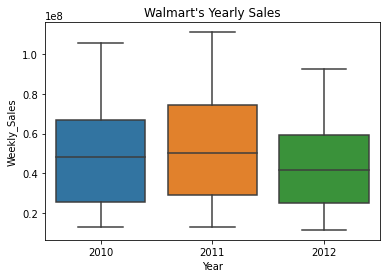

In [ ]:
store_yearly_sales = train_df.groupby(['Store', 'Date','Year'])['Weekly_Sales'].sum().reset_index()\
                  .groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()

store_yearly_sales_plot = sns.boxplot('Year', 'Weekly_Sales', data=store_yearly_sales, orient='v')
plt.title("Walmart's Yearly Sales")
plt.show()

In [ ]:
store_yearly_sales.groupby('Year')['Weekly_Sales'].describe().unstack(1).reset_index().pivot(index='level_0',columns='Year',values=0)

Year            2010         2011        2012
level_0                                      
25%      25568078.15  29117302.67 24827530.71
50%      48370383.86  50360182.06 41739164.15
75%      66890648.24  74169225.52 59212433.28
count          45.00        45.00       45.00
max     105462242.38 111092293.33 92771189.24
mean     50864136.01  54404444.61 44447396.87
min      12766834.26  12957836.67 11435551.03
std      26783836.58  28592598.28 23019092.76

In [ ]:
# Annual Sales by Dept
avg_dept_yearly_sales = train_df.groupby(['Dept', 'Date','Year'])['Weekly_Sales'].sum().reset_index()\
                  .groupby(['Dept', 'Year'])['Weekly_Sales'].sum().reset_index()\
                  .groupby(['Dept'])['Weekly_Sales'].mean().reset_index()
avg_dept_yearly_sales.rename(columns={'Weekly_Sales': 'Avg_Yearly_Sales_by_Dept'}, inplace=True)

avg_dept_yearly_sales['Avg_Yearly_Sales_by_Dept'].describe().to_frame()

Avg_Yearly_Sales_by_Dept
count                     81.00
mean                27725181.02
std                 34514620.50
min                    -1654.31
25%                  4028979.00
50%                 13276306.46
75%                 39299129.19
max                161314447.29

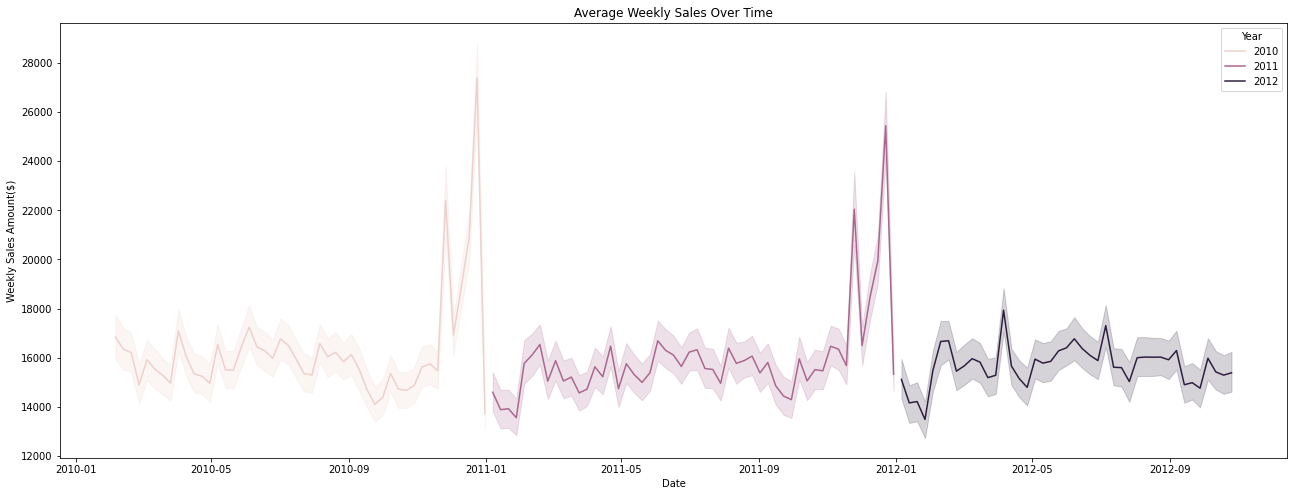

In [ ]:
#Average Weekly Sales over time
plt.figure(figsize=(22,8))
plt.xlabel('Date')
plt.ylabel('Weekly Sales Amount($)')
plt.title('Average Weekly Sales Over Time')
sns.lineplot(x='Date',y='Weekly_Sales',hue='Year',data=train_df)
plt.show()

Observation:
* Similar trend recorded in 2010 and 2011.
* At the end of the year, there is sales peak compared to other month which lies on Christmas and Thanksgiving.

In [ ]:
Weekly_Sales_Holiday = train_df.groupby(['Date','Year','IsHoliday'])['Weekly_Sales'].sum().reset_index()
Weekly_Sales_Holiday

Date  Year  IsHoliday  Weekly_Sales
0   2010-02-05  2010      False   49750740.50
1   2010-02-12  2010       True   48336677.63
2   2010-02-19  2010      False   48276993.78
3   2010-02-26  2010      False   43968571.13
4   2010-03-05  2010      False   46871470.30
..         ...   ...        ...           ...
138 2012-09-28  2012      False   43734899.40
139 2012-10-05  2012      False   47566639.31
140 2012-10-12  2012      False   46128514.25
141 2012-10-19  2012      False   45122410.57
142 2012-10-26  2012      False   45544116.29

[143 rows x 4 columns]

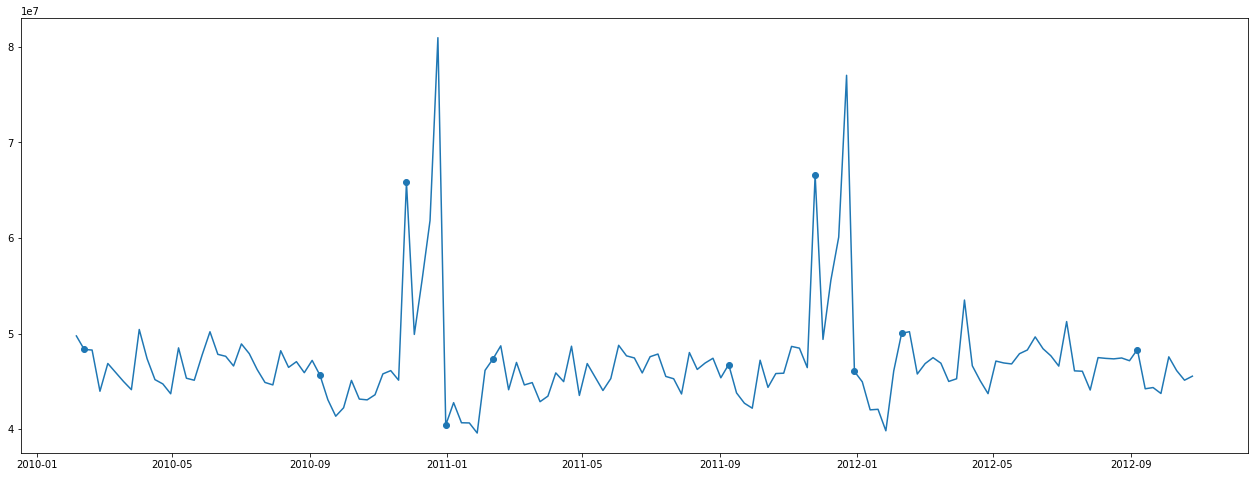

In [ ]:
plt.figure(figsize=(22,8))
plt.plot(Weekly_Sales_Holiday['Date'],Weekly_Sales_Holiday['Weekly_Sales'])
plt.scatter(Weekly_Sales_Holiday[(Weekly_Sales_Holiday.IsHoliday == True)]['Date'].tolist(),Weekly_Sales_Holiday[(Weekly_Sales_Holiday.IsHoliday == True)]['Weekly_Sales'].tolist(),marker='o')

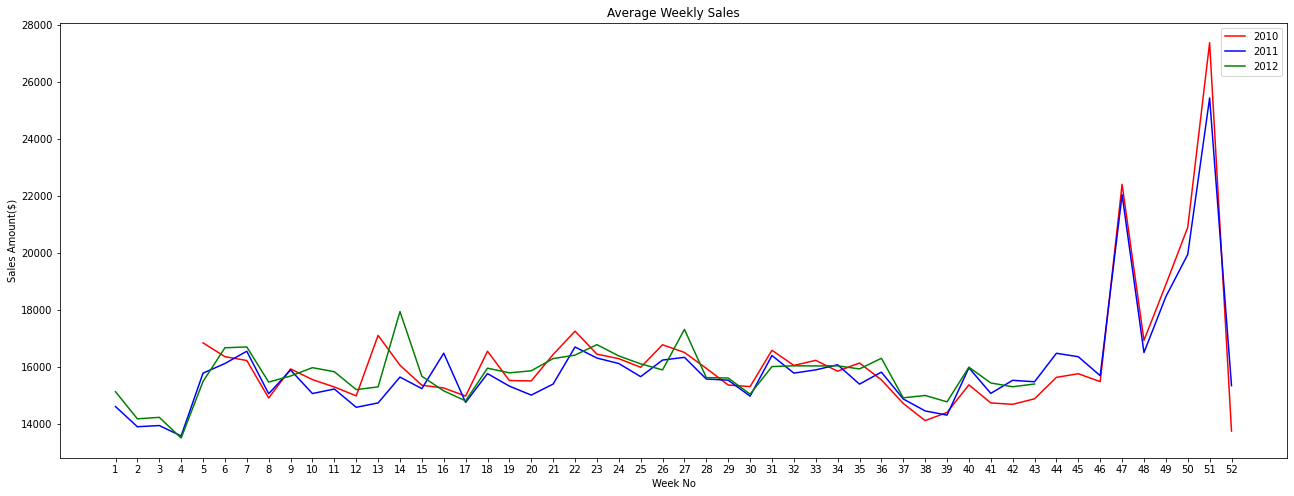

In [ ]:
#Average Weekly Sales
plt.figure(figsize=(22,8))
plt.xticks(np.arange(1,53,step=1))
plt.xlabel('Week No')
plt.ylabel('Sales Amount($)')
plt.title('Average Weekly Sales')

Weekly_Sales_2010 = train_df[train_df.Year == 2010].groupby('Week')['Weekly_Sales'].mean()
Weekly_Sales_2011 = train_df[train_df.Year == 2011].groupby('Week')['Weekly_Sales'].mean()
Weekly_Sales_2012 = train_df[train_df.Year == 2012].groupby('Week')['Weekly_Sales'].mean()

plt.plot(Weekly_Sales_2010,"red",label='2010')
plt.plot(Weekly_Sales_2011,"blue",label='2011')
plt.plot(Weekly_Sales_2012,"green",label='2012')

plt.legend()

plt.show()

Observation:
* Slight fluctuating is recorded for every week. 
* Week 45 to 50 have higher sales where Christmas and thanksgiving comes.

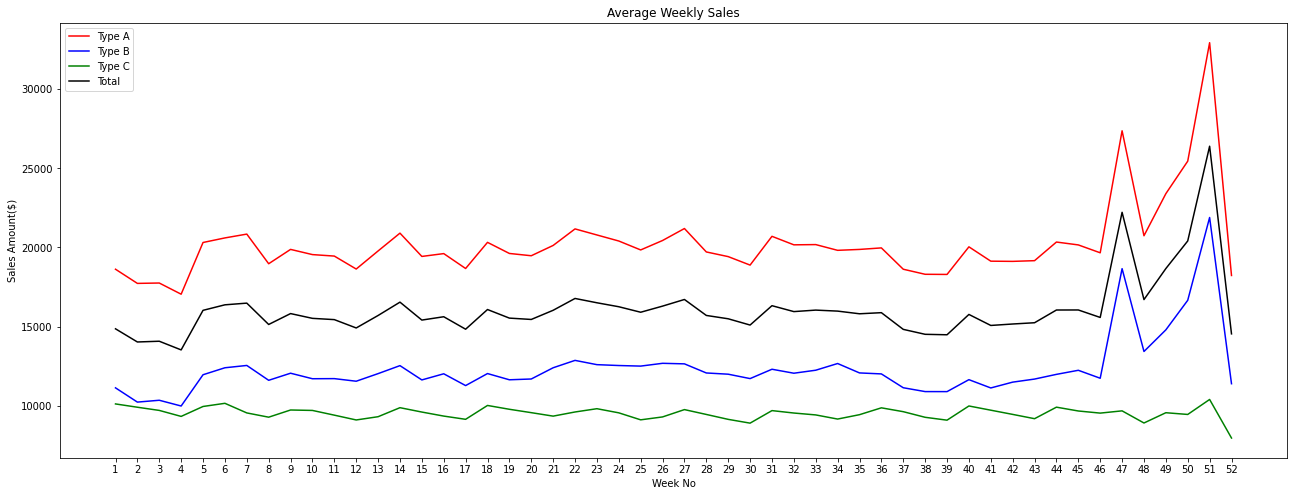

In [ ]:
#Average Stores Type Sales

Weekly_Sales_A = train_df[train_df.Type=="A"].groupby('Week')['Weekly_Sales'].mean()
Weekly_Sales_B = train_df[train_df.Type=="B"].groupby('Week')['Weekly_Sales'].mean()
Weekly_Sales_C = train_df[train_df.Type=="C"].groupby('Week')['Weekly_Sales'].mean()
Weekly_Sales_Total = train_df.groupby('Week')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(Weekly_Sales_A,"red",label='Type A')
plt.plot(Weekly_Sales_B,"blue",label='Type B')
plt.plot(Weekly_Sales_C,"green",label='Type C')
plt.plot(Weekly_Sales_Total,"black",label='Total')

plt.xticks(np.arange(1,53,step=1))
plt.xlabel('Week No')
plt.ylabel('Sales Amount($)')
plt.title('Average Weekly Sales')
plt.legend()

plt.show()

Observation:
* Sales varies across store types.
* Type A recorded a higher average weekly sales, followed by Type B.
* Type A and B share similar trend i.e. recorded peak at year end, whereas Type C sales was relatively stable across 52 weeks.

In [29]:
#Average Department Weekly Sales

dept_weekly_sales = data.groupby(['Dept','Date','Type'])['Weekly_Sales'].sum().reset_index()\
                    .groupby(['Dept','Type'])['Weekly_Sales'].mean().reset_index()
dept_weekly_sales.rename(columns={'Weekly_Sales': 'Weekly_Sales_by_Dept'}, inplace=True)
dept_weekly_sales

pivot = pd.pivot_table(data=dept_weekly_sales, index=['Dept'], columns=['Type'], values='Weekly_Sales_by_Dept')
pivot

Type          A         B         C
Dept                               
1     505051.53 305844.89  53710.40
2    1143882.85 731883.95  86549.11
3     305382.73 220412.04   4921.66
4     725423.91 361418.23  82016.22
5     583865.32 360138.25   4299.64
...         ...       ...       ...
95   2136068.57 702181.08 303849.39
96    379648.77  42076.17  94596.15
97    486063.76  59268.72  80517.26
98    241555.96   4089.41  32878.55
99      3930.40     25.72      9.21

[81 rows x 3 columns]

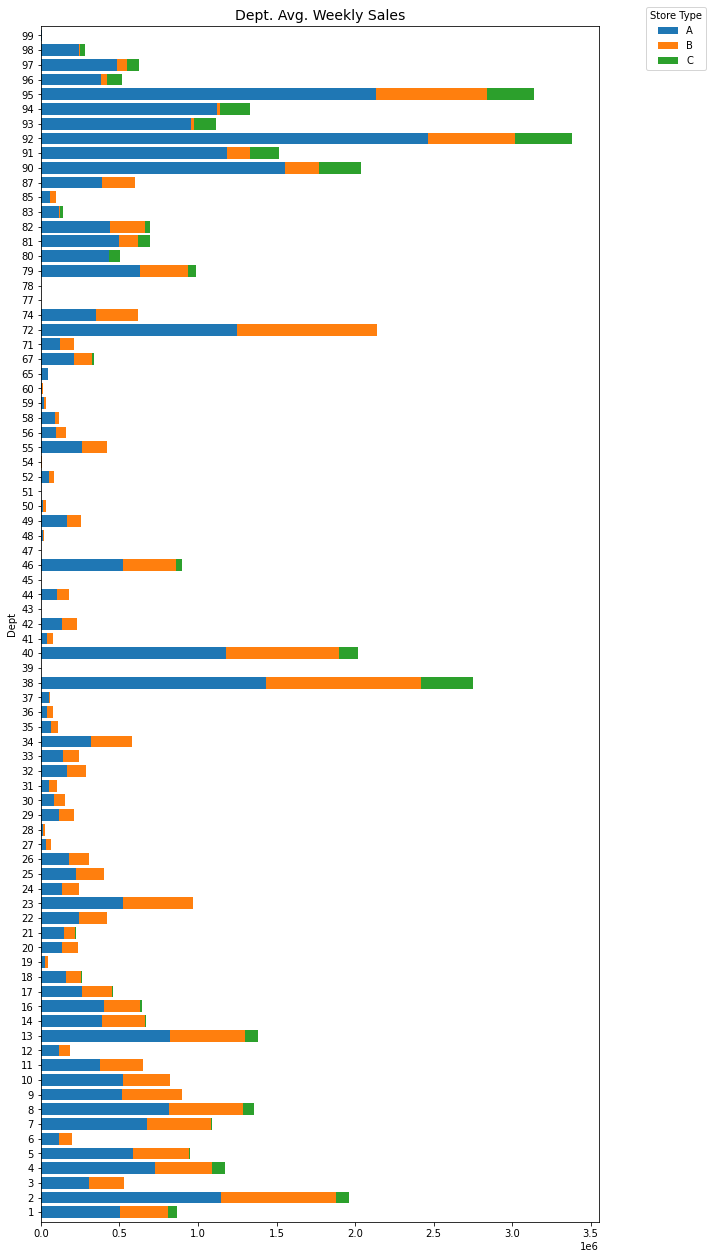

In [ ]:
ax = pivot.plot.barh(stacked=True, figsize=(10,22),width=0.8)
ax.set_title('Dept. Avg. Weekly Sales', fontsize=14)
plt.legend(title='Store Type',bbox_to_anchor=(1.2, 1.02))

Observation:
- Dept 30,36,43,50,51,54,58,65,77,78 are absent in Type C stores.
- Dept 65 is absent in Type B stores.
- All depts are present in Type A stores.

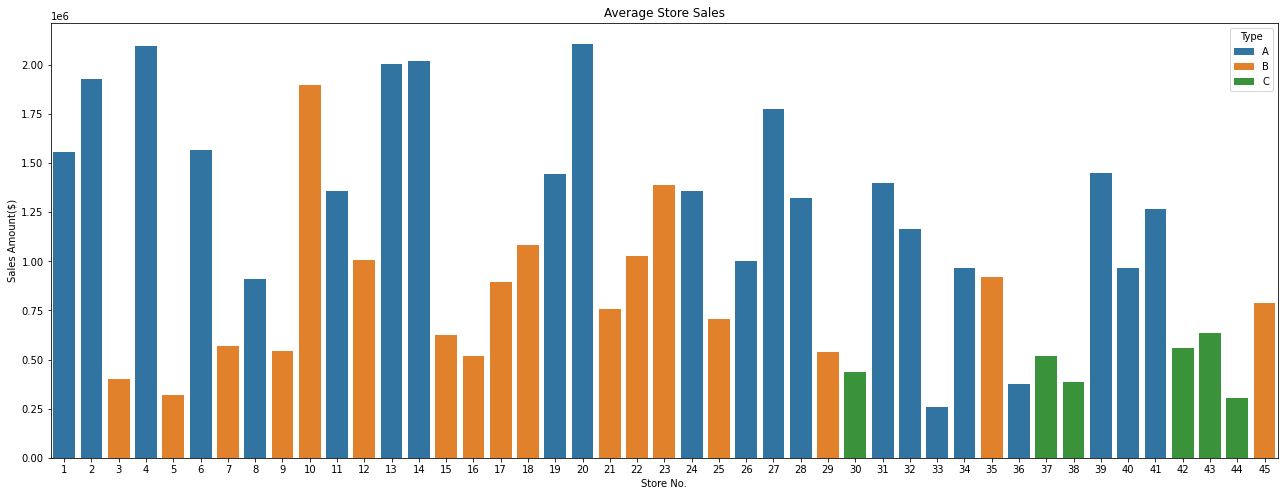

In [ ]:
#Average Store Sales

plt.figure(figsize=(22,8))

store_weekly_sales = train_df.groupby(['Store', 'Date','Type'])['Weekly_Sales'].sum().reset_index()\
                     .groupby(['Store','Type'])['Weekly_Sales'].mean().reset_index()

sns.barplot(x='Store',y='Weekly_Sales',hue='Type',data=store_weekly_sales, dodge=False)
plt.xlabel('Store No.')
plt.ylabel('Sales Amount($)')
plt.title('Average Store Sales')
plt.legend(loc='upper right',title='Type')


In [ ]:
store_weekly_sales.groupby('Type')['Weekly_Sales'].mean().to_frame()

Weekly_Sales
Type              
A       1376673.47
B        822994.96
C        472614.83

Observation:
- Most stores recorded high avg. yearly sales are within Type A.
- Averaging out, the avg. yearly sales per store of Type A is 67% higher than Type B and triple of that of Type C.


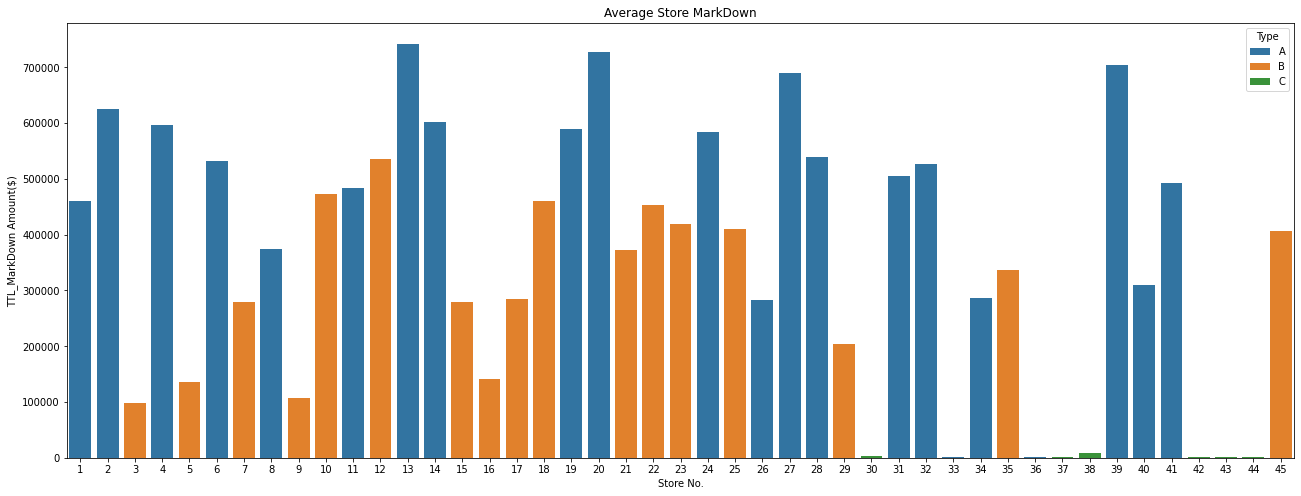

In [ ]:
#Average Store MarkDown

plt.figure(figsize=(22,8))

store_weekly_markdown = train_df.groupby(['Store','Type','Date'])['TTL_MarkDown'].sum().reset_index()\
                        .groupby(['Store','Type'])['TTL_MarkDown'].mean().reset_index()

sns.barplot(x='Store',y='TTL_MarkDown',hue='Type',data=store_weekly_markdown, dodge=False)
plt.xlabel('Store No.')
plt.ylabel('TTL_MarkDown Amount($)')
plt.title('Average Store MarkDown')
plt.legend(loc='upper right',title='Type')

In [ ]:
store_weekly_markdown.groupby('Type')['TTL_MarkDown'].mean().to_frame()

TTL_MarkDown
Type              
A        484416.11
B        317724.56
C          3167.94

Observation:
- Markdown is significantly recorded in Type A & B stores but not in Type C and most of the high records lies within Type A.
- Markdown of Type A is 50% higher than that of Type B.

Text(0.5, 1.0, 'No. of Depts per Store')

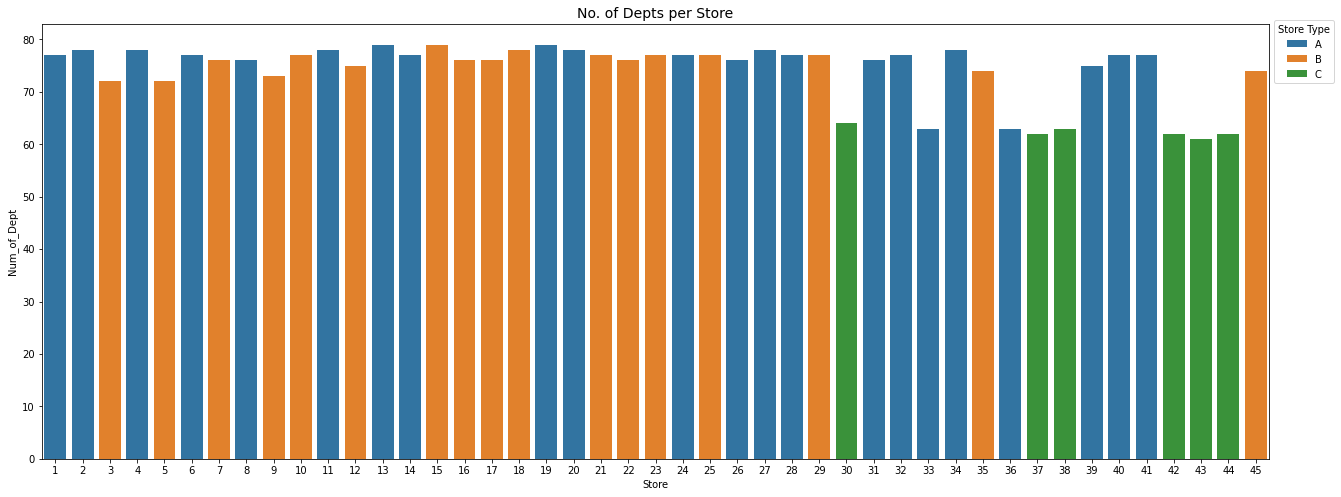

In [ ]:
#No. of Dept per store
num_of_dept = train_df.groupby(['Store','Type'])['Dept'].nunique().reset_index()
num_of_dept.rename(columns={'Dept': 'Num_of_Dept'}, inplace=True)
num_of_dept

plt.figure(figsize=(22,8))
sns.barplot(x='Store',y='Num_of_Dept',hue='Type',data=num_of_dept,dodge=False)
plt.legend(title='Store Type',bbox_to_anchor=(1.0, 1.02))
plt.title('No. of Depts per Store',fontsize=14)

Observation:
- Type A & B stores have fair no. of dept. while Type C stores dept. no. is significantly fewer.

In [ ]:
#Average Store Type Sales
Type_Weekly_Sales = train_df.groupby('Type')['Weekly_Sales'].mean()
Type_Weekly_Sales = Type_Weekly_Sales.reset_index()
Type_Weekly_Sales
Type_Size = train_df.groupby('Type')['Size'].mean()
Type_Size = Type_Size.reset_index()
Type_Size

Type           Size
0    A  182231.285486
1    B  101818.735827
2    C   40535.725286

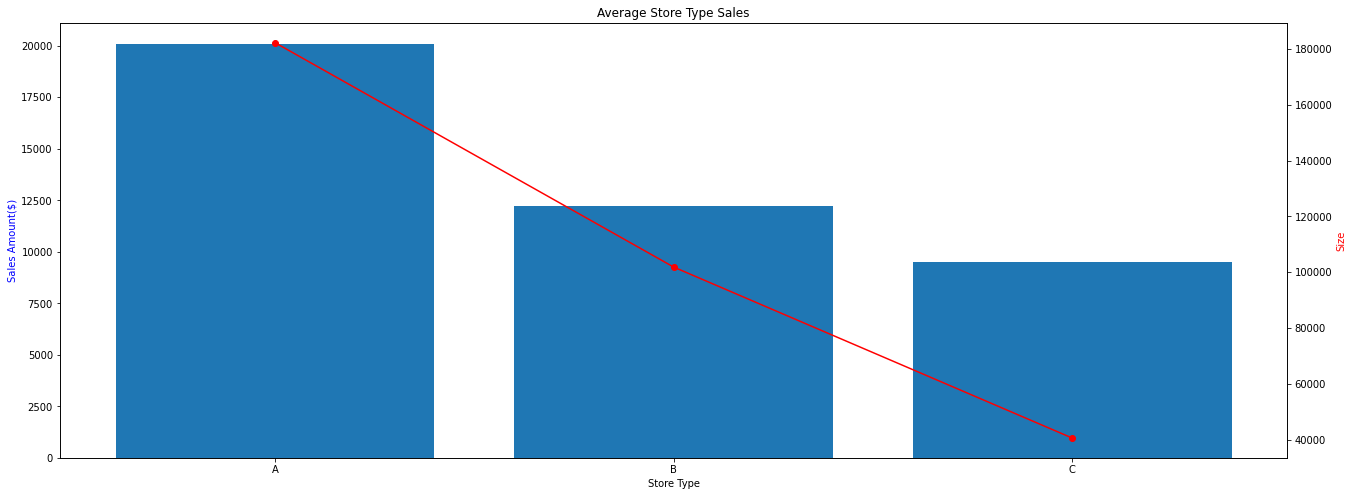

In [ ]:
#Average Store Type Sales --> Store type is determined by size
fig,ax = plt.subplots(figsize=(22,8))
ax.bar(Type_Weekly_Sales.Type,Type_Weekly_Sales.Weekly_Sales)
ax.set_xlabel("Store Type")
ax.set_ylabel('Sales Amount($)',color="blue")
ax2=ax.twinx()
ax2.plot(Type_Size.Type,Type_Size.Size,color="red",marker="o")
ax2.set_ylabel("Size",color="red")
plt.title('Average Store Type Sales')
plt.show()

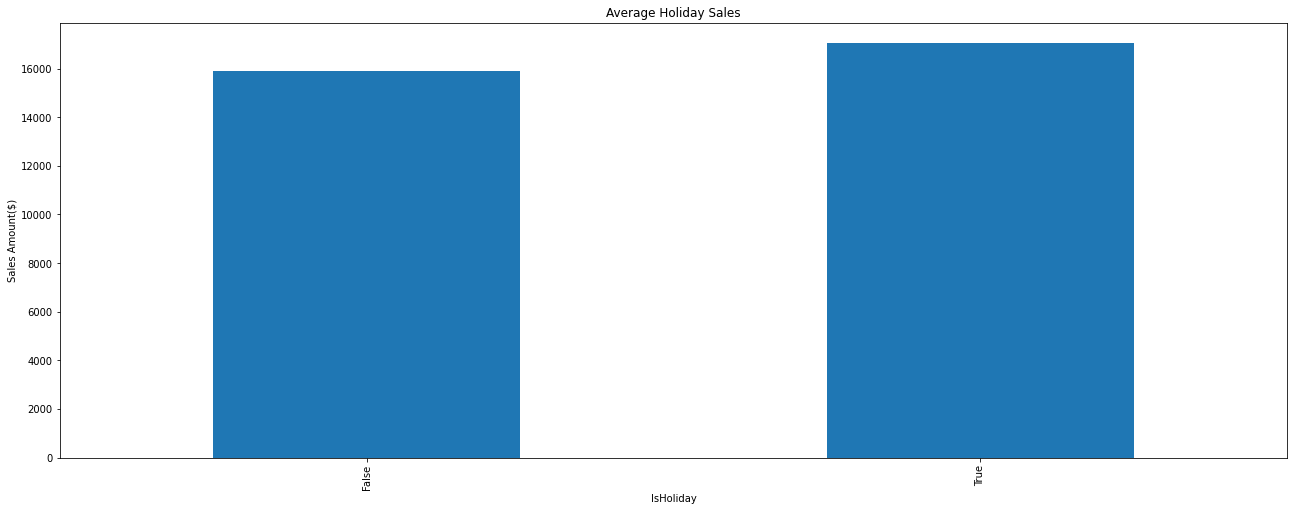

In [ ]:
#Holiday vs. Non-Holidays Sales
plt.figure(figsize=(22,8))
plt.xlabel('Holiday')
plt.ylabel('Sales Amount($)')
plt.title('Average Holiday Sales')
train_df.groupby('IsHoliday')['Weekly_Sales'].mean().plot(kind='bar')
plt.show()

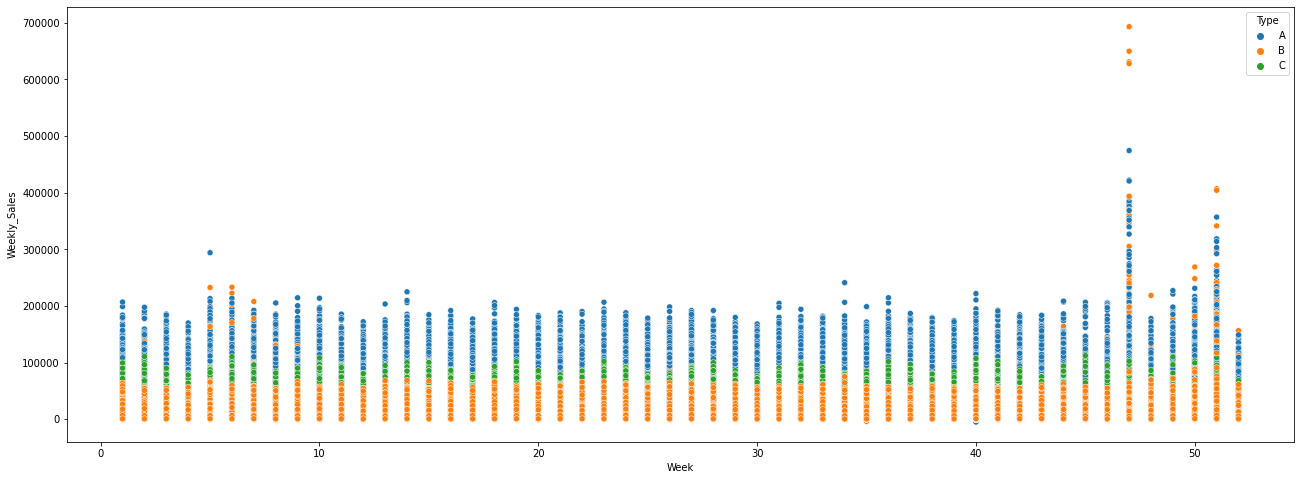

In [ ]:
#Relationship of Week No. vs. Sales --> Yes relationship
plt.figure(figsize=(22,8))
sns.scatterplot(x=train_df.Week,y=train_df.Weekly_Sales,hue=train_df.Type)


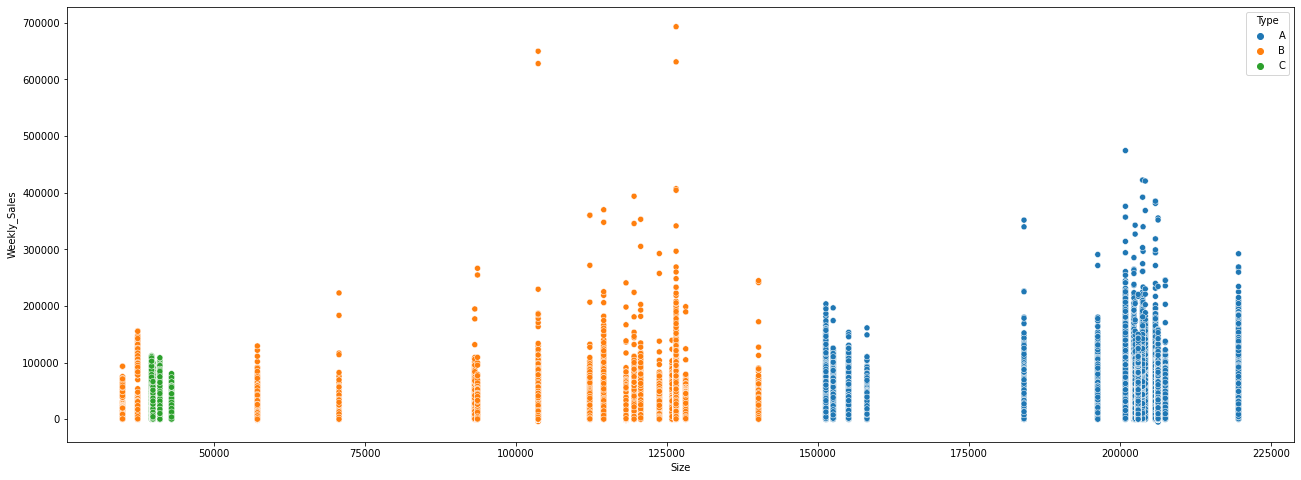

In [ ]:
#Relationship of Size of Store vs. Sales --> Yes relationship
plt.figure(figsize=(22,8))
sns.scatterplot(x=train_df.Size,y=train_df.Weekly_Sales,hue=train_df.Type)

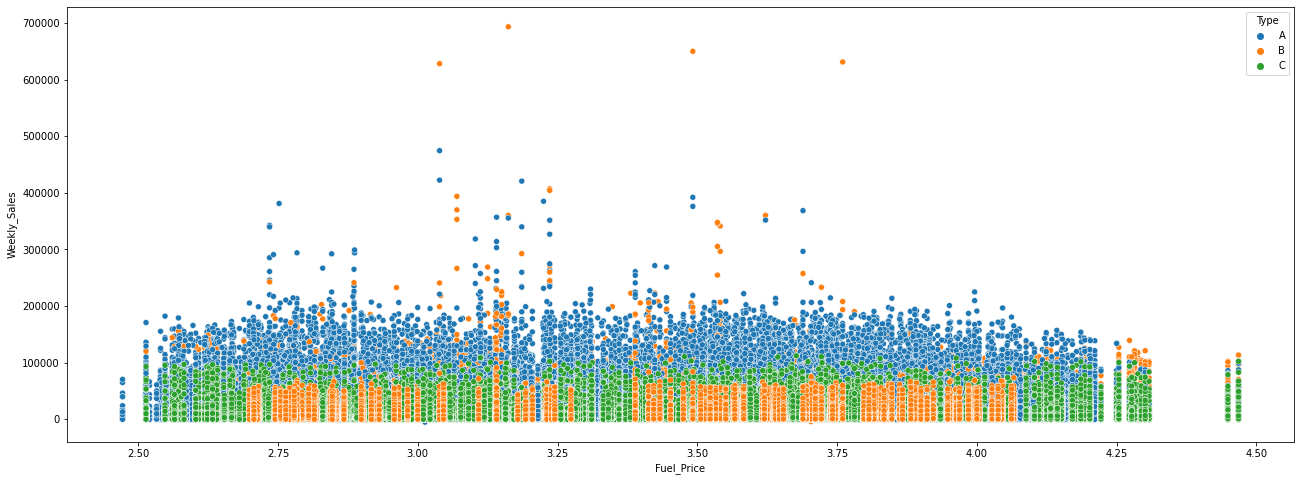

In [ ]:
#Relationship of Fuel Price vs. Sales --> No relationship
plt.figure(figsize=(22,8))
sns.scatterplot(x=train_df.Fuel_Price,y=train_df.Weekly_Sales,hue=train_df.Type)

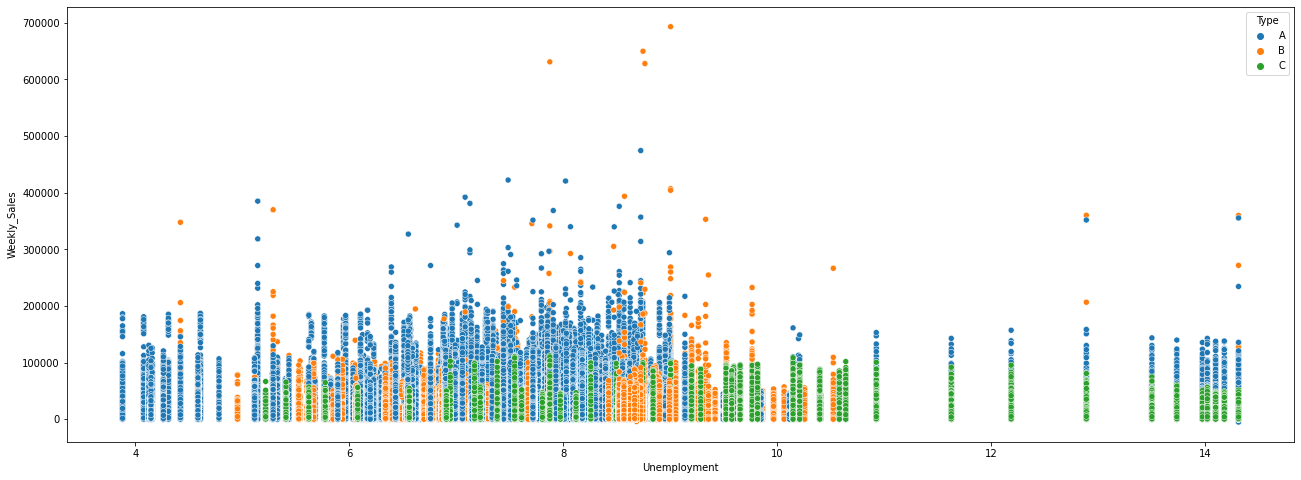

In [ ]:
#Relationship of Unemployment Rate vs. Sales --> No relationship
plt.figure(figsize=(22,8))
sns.scatterplot(x=train_df.Unemployment,y=train_df.Weekly_Sales,hue=train_df.Type)

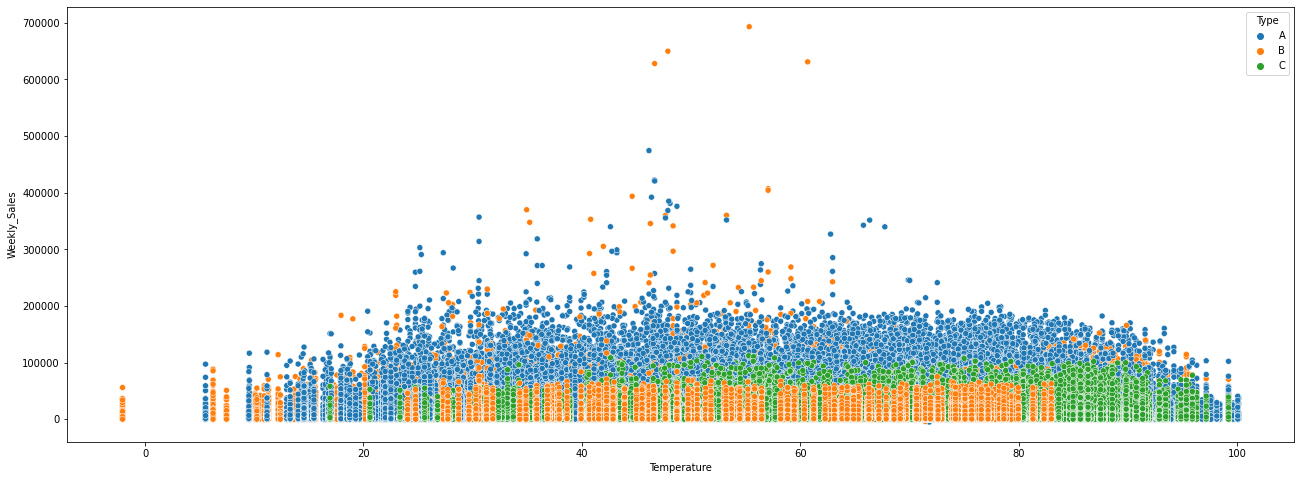

In [ ]:
#Relationship of Temperature vs. Sales --> No relationship
plt.figure(figsize=(22,8))
sns.scatterplot(x=train_df.Temperature,y=train_df.Weekly_Sales,hue=train_df.Type)

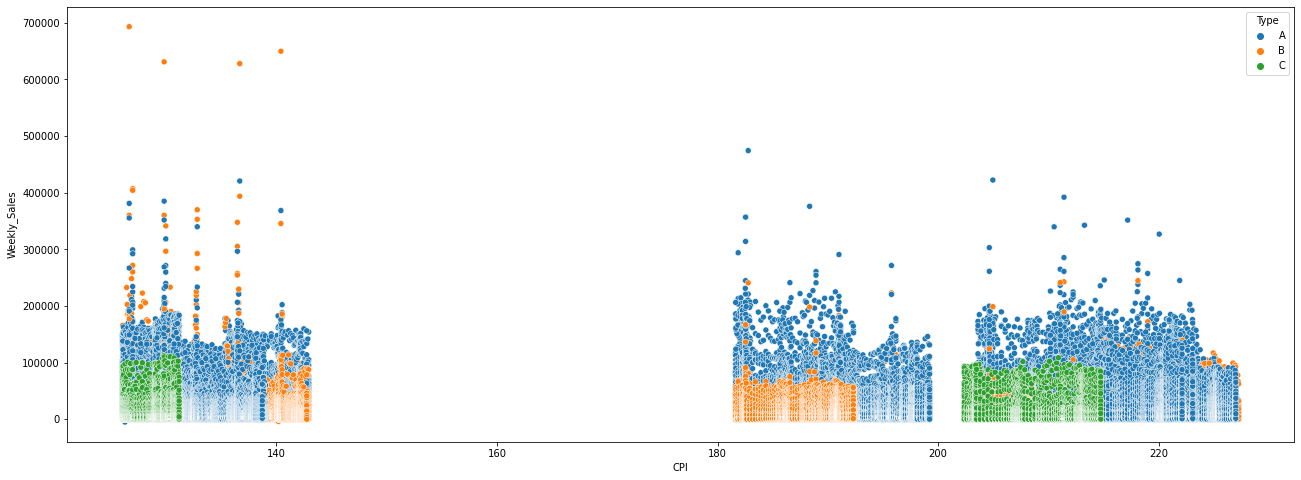

In [ ]:
#Relationship of CPI vs. Sales --> No relationship
plt.figure(figsize=(22,8))
sns.scatterplot(x=train_df.CPI,y=train_df.Weekly_Sales,hue=train_df.Type)

Text(0.5, 1.0, 'Correlation Matrix')

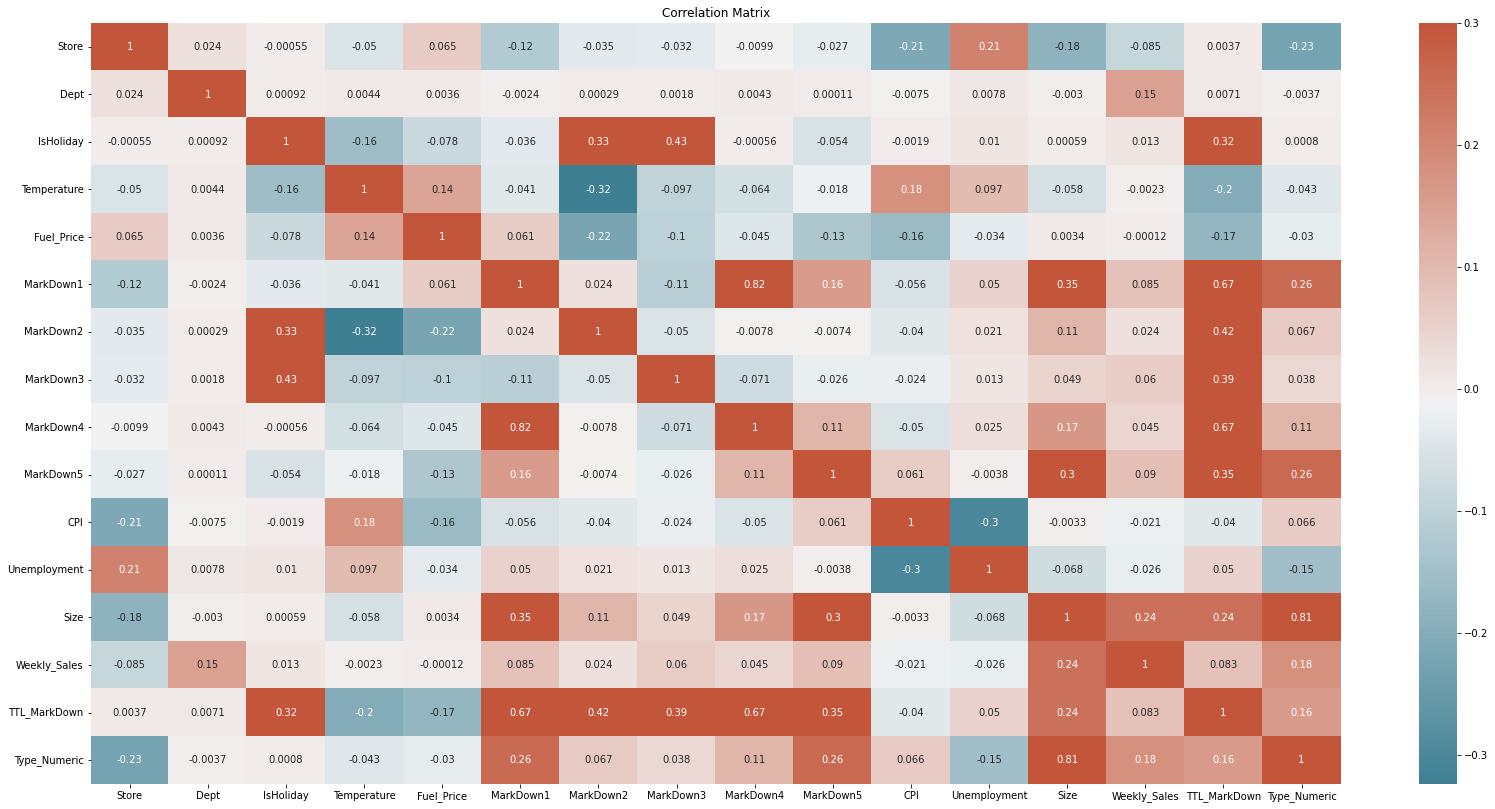

In [ ]:
#Correlation Matrix
data_corr = train_df.drop(columns=['Year','Month','Week','Day'])
storetype_values = {'A':3, 'B':2, 'C':1}
data_corr['Type_Numeric'] = data_corr.Type.map(storetype_values)
plt.figure(figsize=(28,14))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(data_corr.corr(), cmap=cmap, vmax=.3, annot=True)
plt.title("Correlation Matrix")

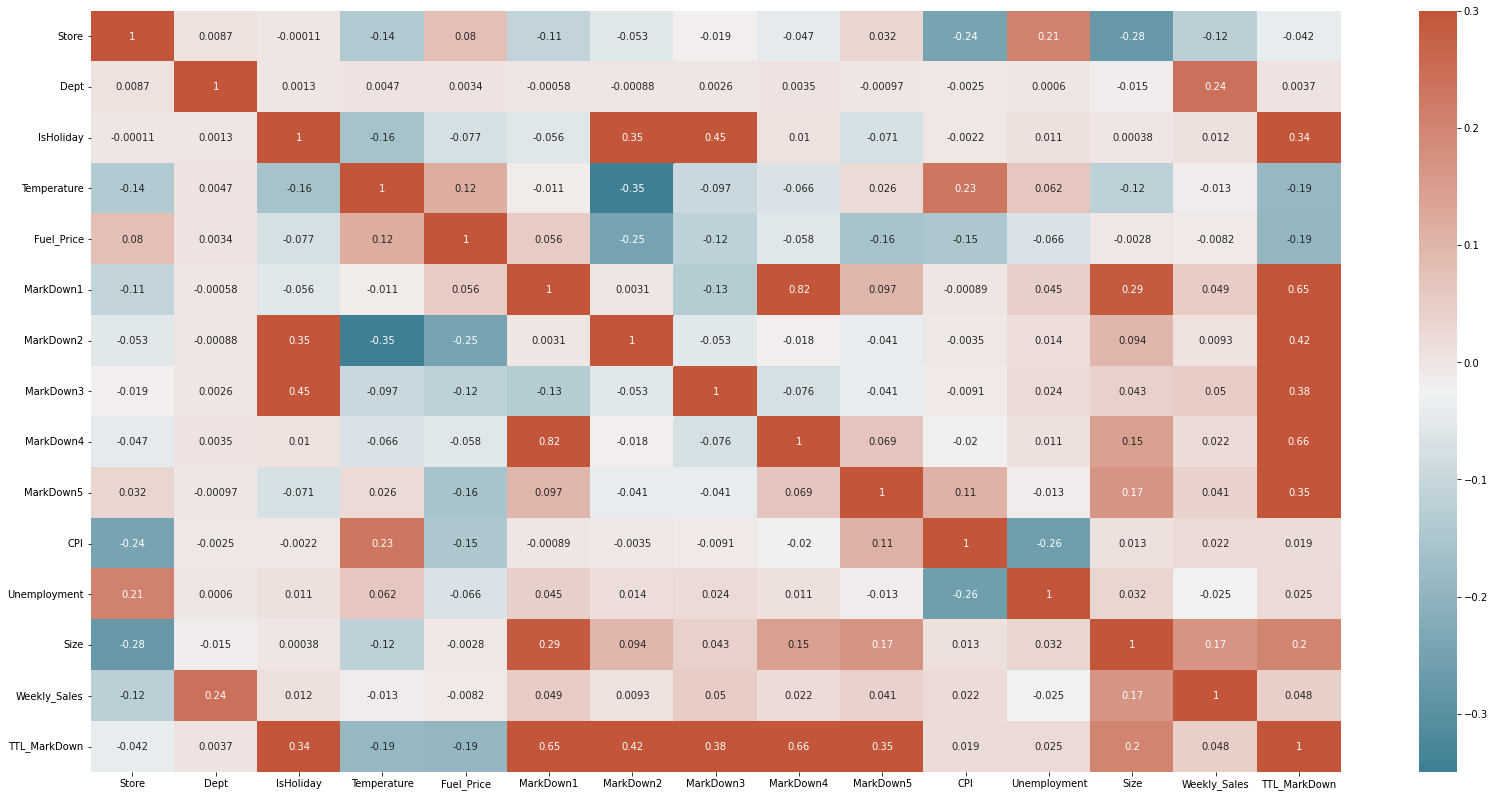

In [ ]:
#Correlation Matrix of only Type A stores
plt.figure(figsize=(28,14))
data_corr_A = data_corr[data_corr['Type'] == "A"]
data_corr_A = data_corr_A.drop(columns = ['Type_Numeric'])
sns.heatmap(data_corr_A.corr(), cmap=cmap, vmax=.3, annot=True)

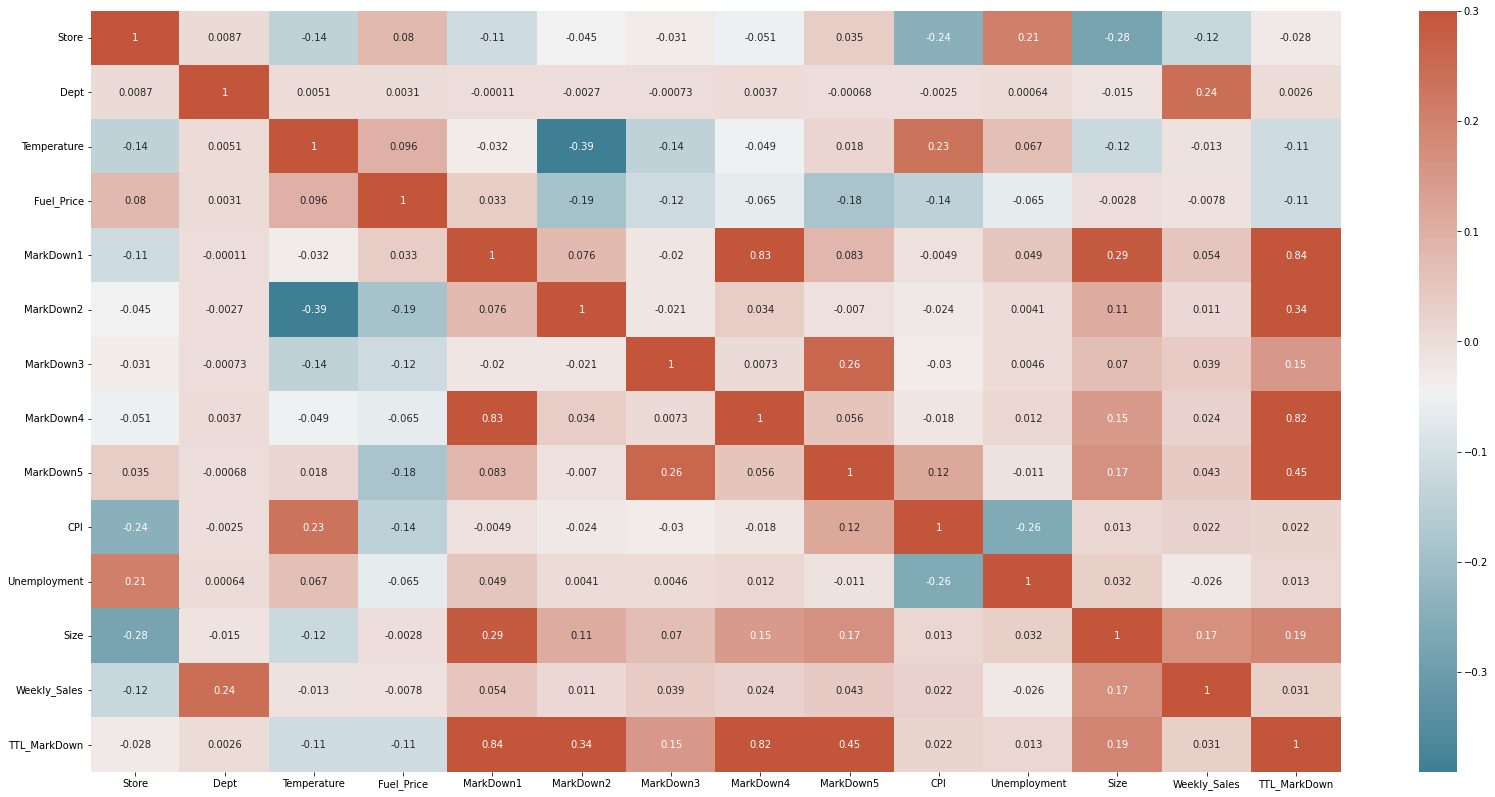

In [ ]:
#Correlation Matrix of only Type A stores and non-holiday
plt.figure(figsize=(28,14))
data_corr_A_non = data_corr_A[data_corr_A['IsHoliday'] == 0]
data_corr_A_non = data_corr_A_non.drop(columns = ['IsHoliday'])
sns.heatmap(data_corr_A_non.corr(), cmap=cmap, vmax=.3, annot=True)

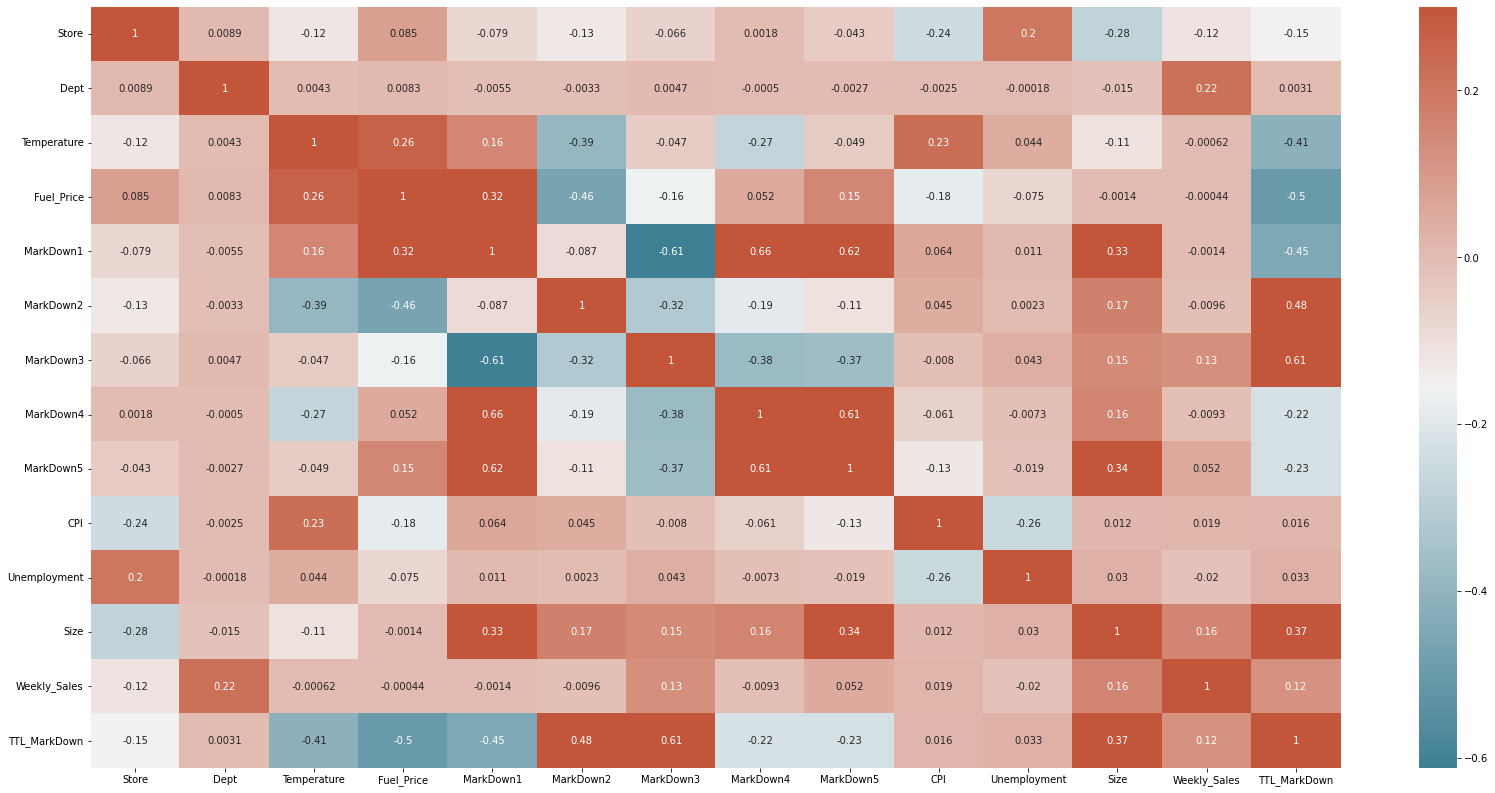

In [ ]:
#Correlation Matrix of only Type A stores and holiday
plt.figure(figsize=(28,14))
data_corr_A_non = data_corr_A[data_corr_A['IsHoliday'] == 1]
data_corr_A_non = data_corr_A_non.drop(columns = ['IsHoliday'])
sns.heatmap(data_corr_A_non.corr(), cmap=cmap, vmax=.3, annot=True)

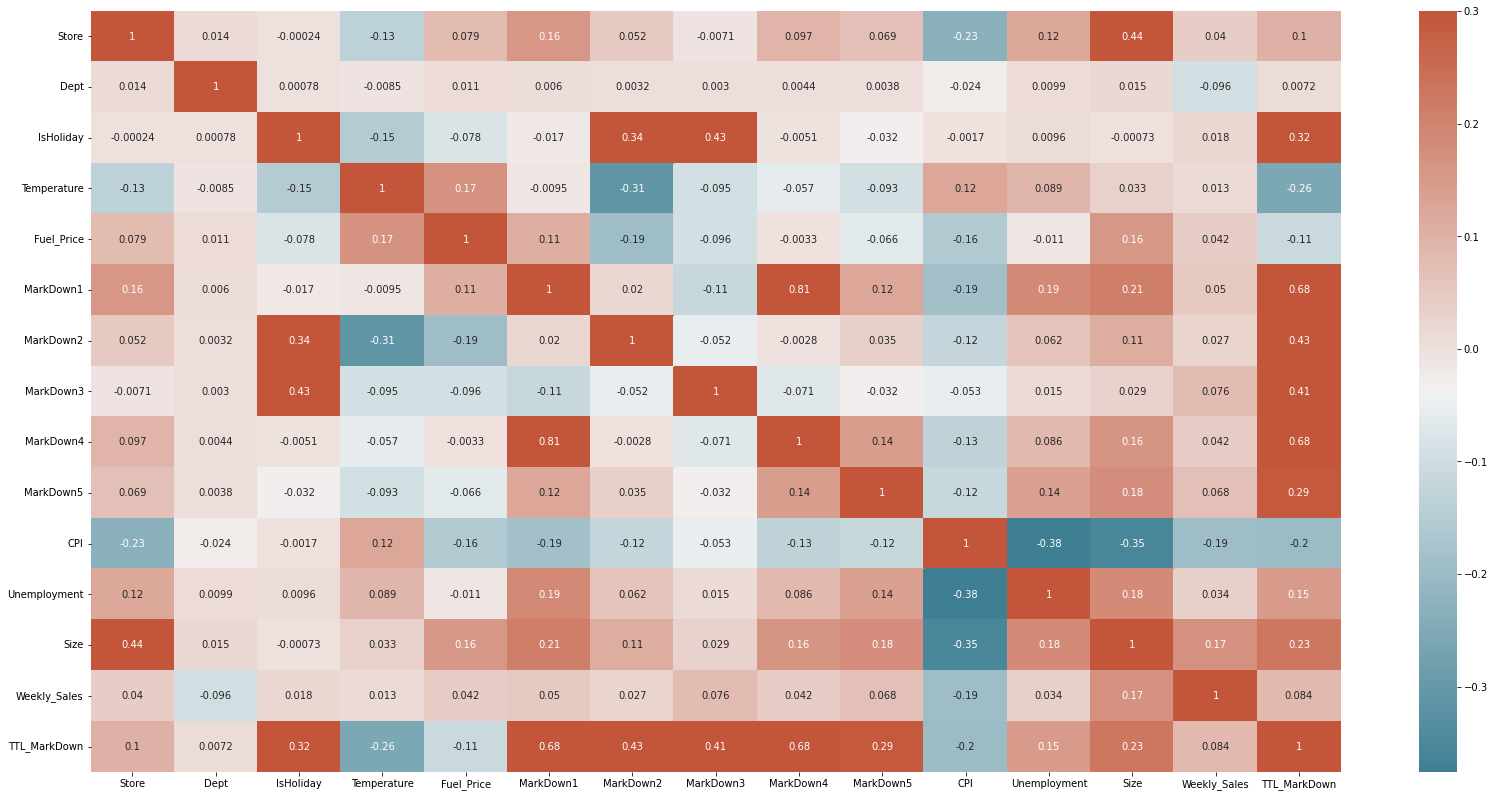

In [ ]:
#Correlation Matrix of only Type B stores
plt.figure(figsize=(28,14))
data_corr_B = data_corr[data_corr['Type'] == "B"]
data_corr_B = data_corr_B.drop(columns = ['Type_Numeric'])
sns.heatmap(data_corr_B.corr(), cmap=cmap, vmax=.3, annot=True)

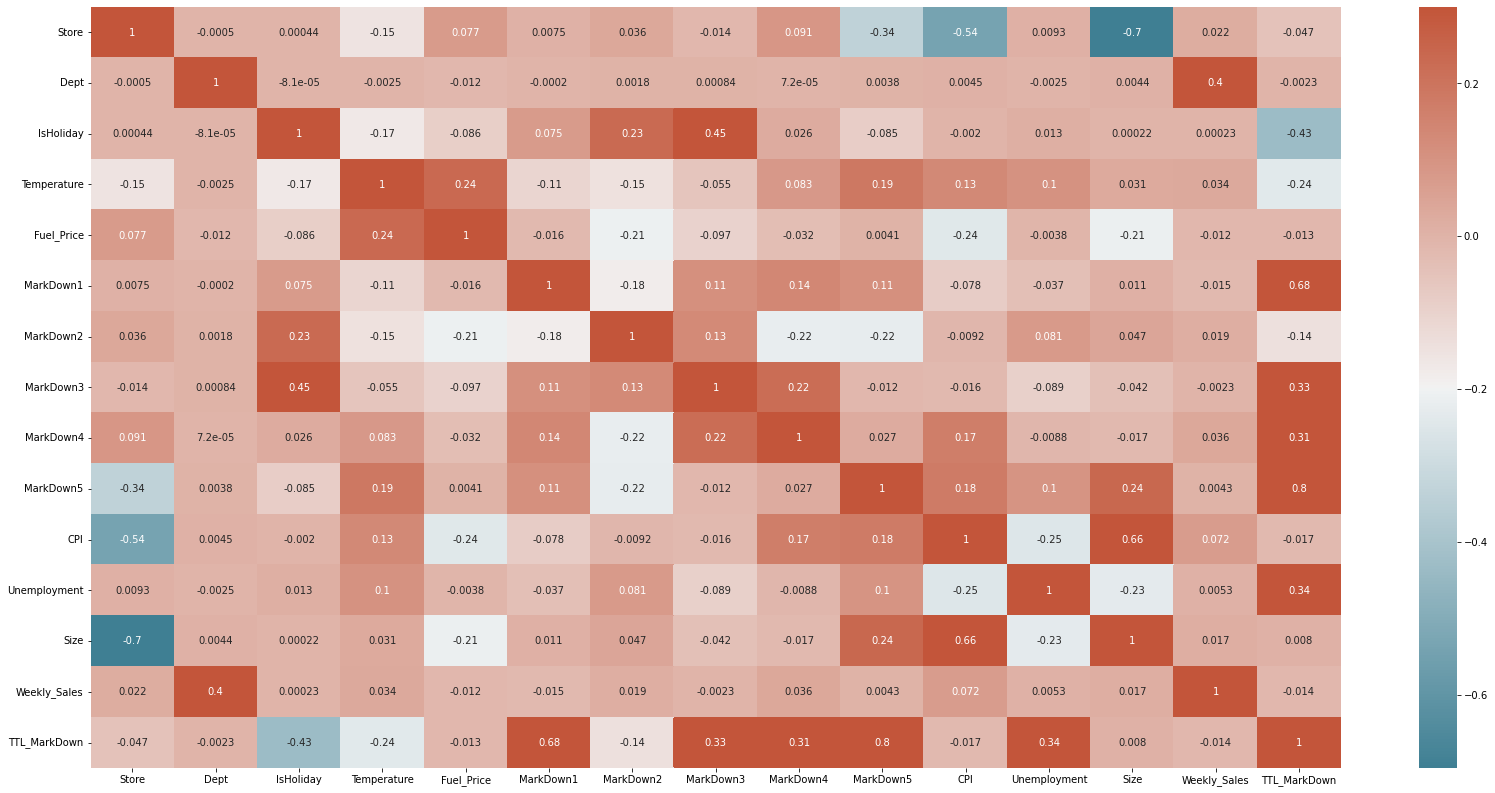

In [ ]:
#Correlation Matrix of only Type C stores
plt.figure(figsize=(28,14))
data_corr_C = data_corr[data_corr['Type'] == "C"]
data_corr_C = data_corr_C.drop(columns = ['Type_Numeric'])
sns.heatmap(data_corr_C.corr(), cmap=cmap, vmax=.3, annot=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
weekly_sales = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
weekly_sales['Date'] = pd.to_datetime(weekly_sales['Date'])
weekly_sales = weekly_sales.set_index('Date')
weekly_sales

Weekly_Sales
Date                    
2010-02-05   49750740.50
2010-02-12   48336677.63
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-05   46871470.30
...                  ...
2012-09-28   43734899.40
2012-10-05   47566639.31
2012-10-12   46128514.25
2012-10-19   45122410.57
2012-10-26   45544116.29

[143 rows x 1 columns]

In [ ]:
decomposition = seasonal_decompose(weekly_sales['Weekly_Sales'], model='additive')
original = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

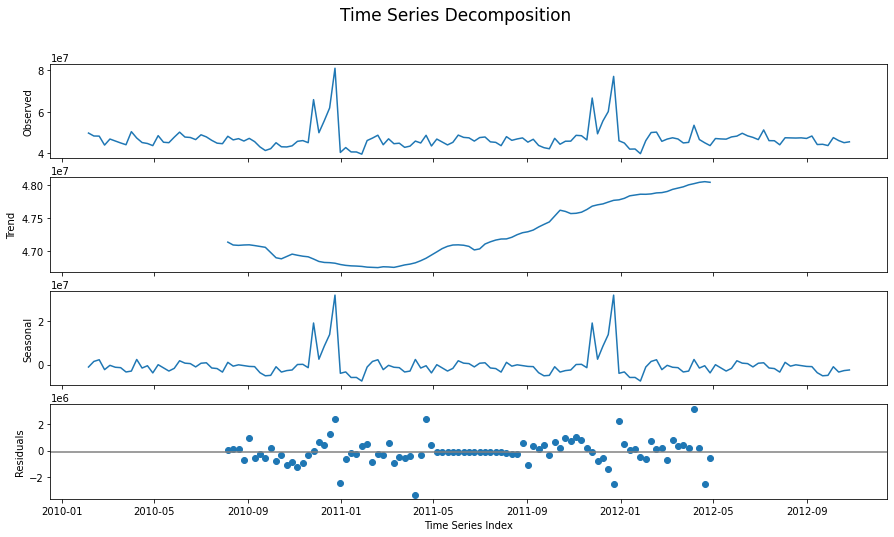

In [ ]:
'''Plot time series decomposition'''

# create figure
fig, ax = plt.subplots(figsize=(15, 8), nrows=4, sharex=True)

ax[0].plot(original)
ax[1].plot(trend)
ax[2].plot(seasonal)
ax[3].scatter(x=residuals.index, y=residuals)
ax[3].axhline(np.mean(residuals), color='gray')

ax[0].set_ylabel('Observed')
ax[1].set_ylabel('Trend')
ax[2].set_ylabel('Seasonal')
ax[3].set_ylabel('Residuals')

plt.xlabel('Time Series Index')
plt.suptitle('Time Series Decomposition', size=17)
plt.show()

In [ ]:
#Check stationarity through Augmented Dickey-Fuller test
X = weekly_sales['Weekly_Sales']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.908298
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


Null Hypo: non-stationary </br>
Alternative Hypo: stationary </br>
As the ADF stat (-5.91) < critical value 1% (-3.48). We are 99% confident to reject the null hypothesis, i.e. data is stationary.